Test Data:
   RowId  IntersectionId  Latitude  Longitude             EntryStreetName  \
0      0               1  33.75094 -84.393032  Peachtree Street Southwest   
1      1               1  33.75094 -84.393032  Peachtree Street Southwest   
2      2               1  33.75094 -84.393032  Peachtree Street Southwest   
3      3               1  33.75094 -84.393032  Peachtree Street Southwest   
4      4               1  33.75094 -84.393032  Peachtree Street Southwest   

               ExitStreetName EntryHeading ExitHeading  Hour  Weekend  Month  \
0  Peachtree Street Southwest           NE          NE     0        0      6   
1   Mitchell Street Southwest           SW          SE     0        0      6   
2  Peachtree Street Southwest           SW          SW     0        0      6   
3  Peachtree Street Southwest           NE          NE     1        0      6   
4  Peachtree Street Southwest           SW          SW     1        0      6   

                                             

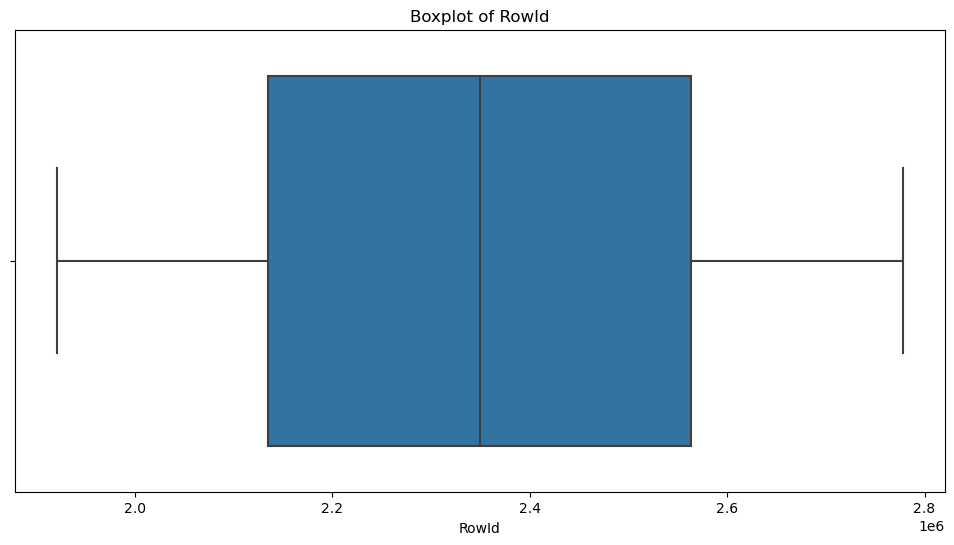

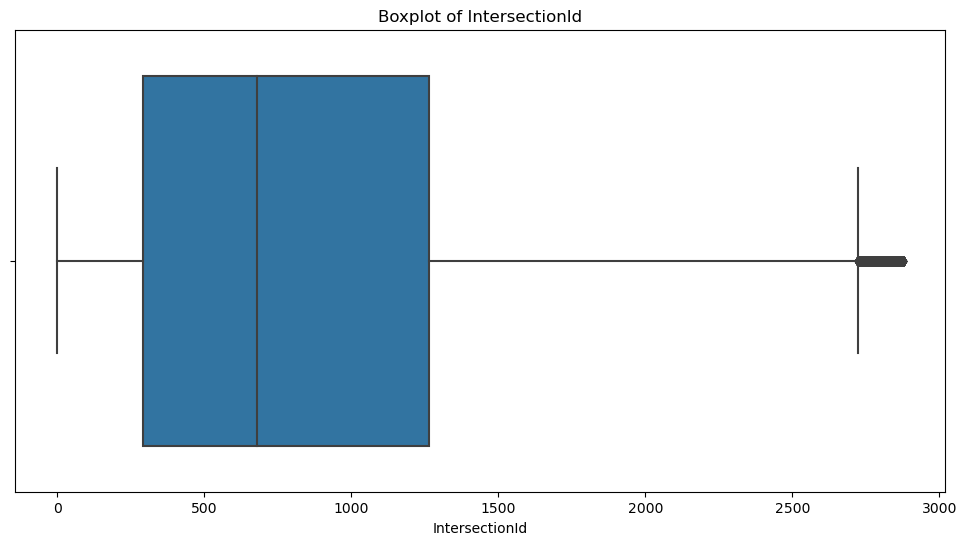

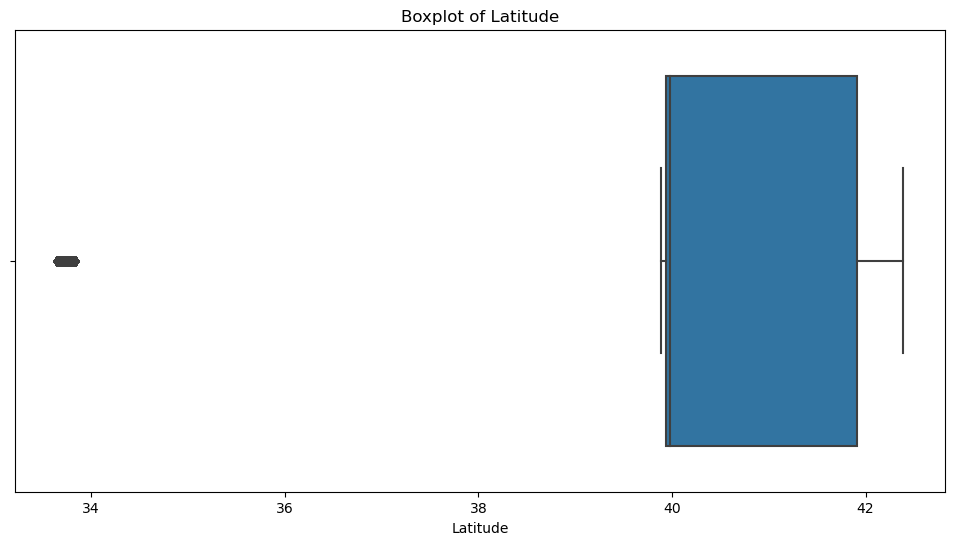

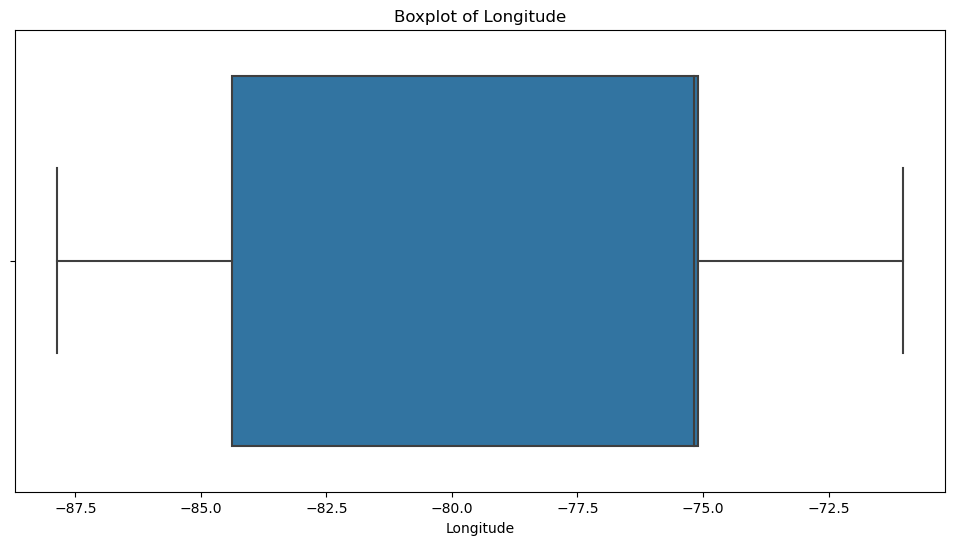

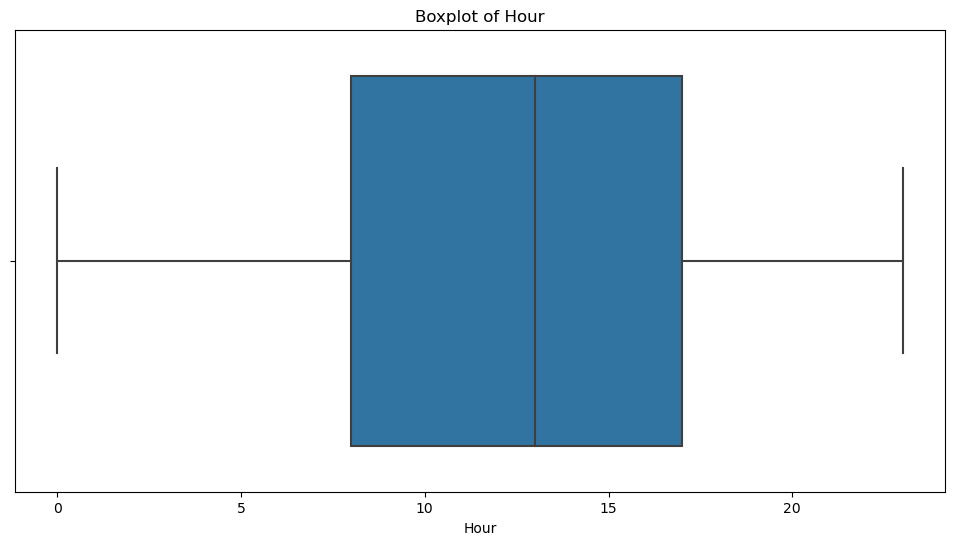

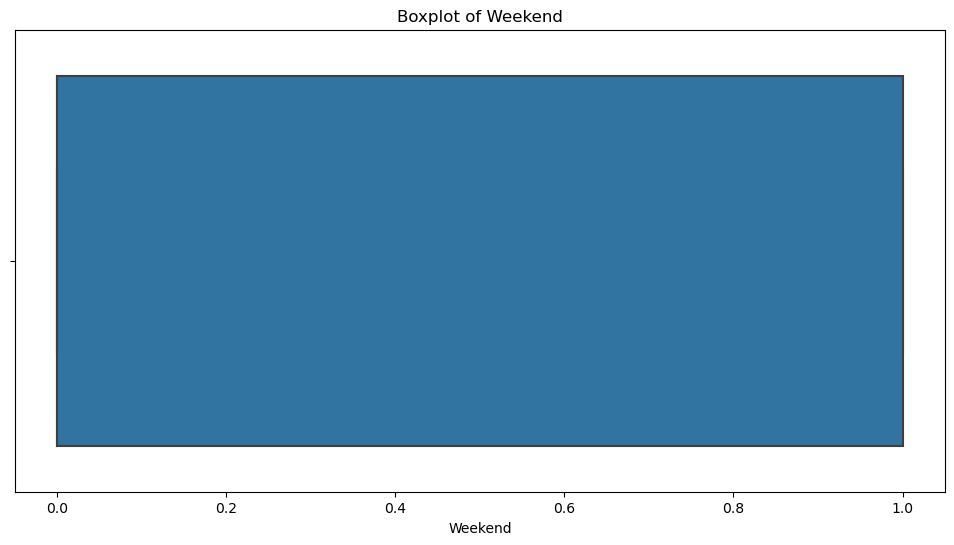

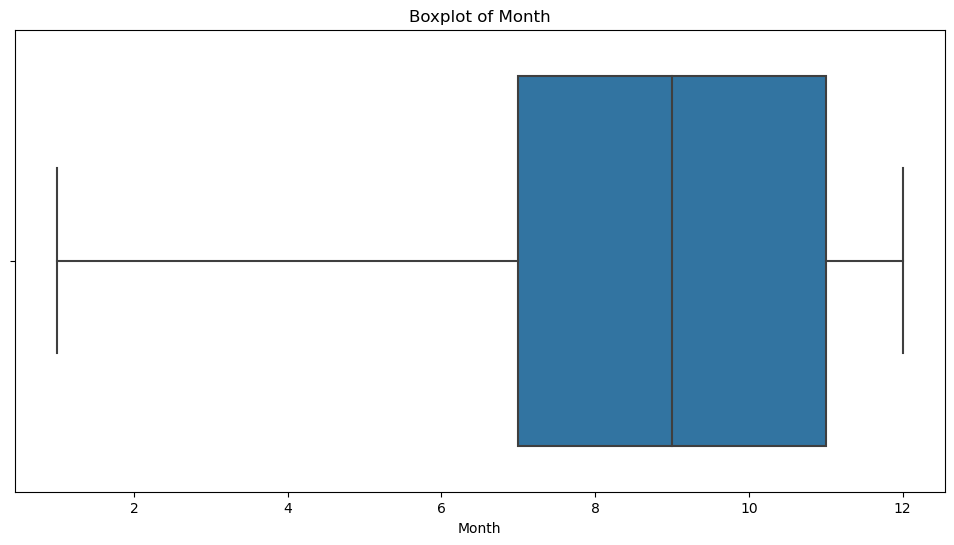

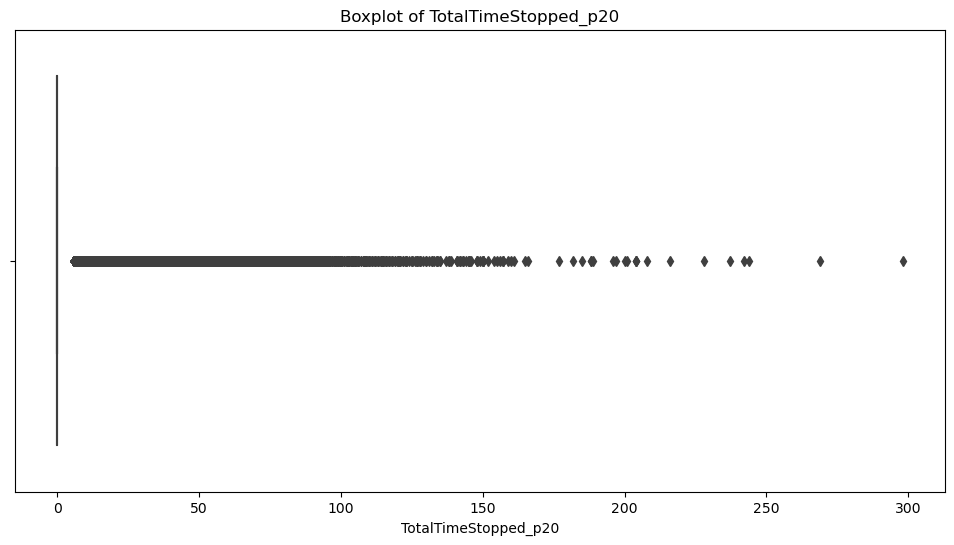

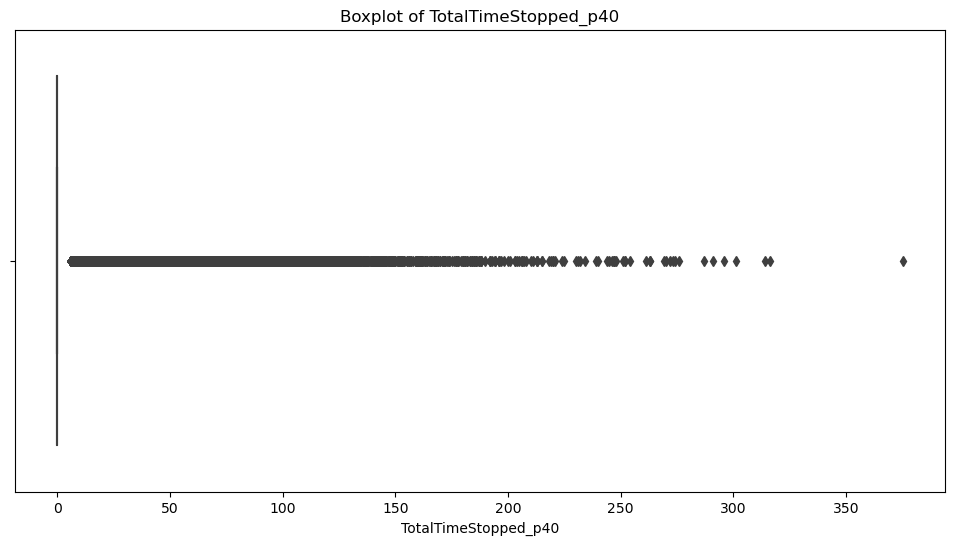

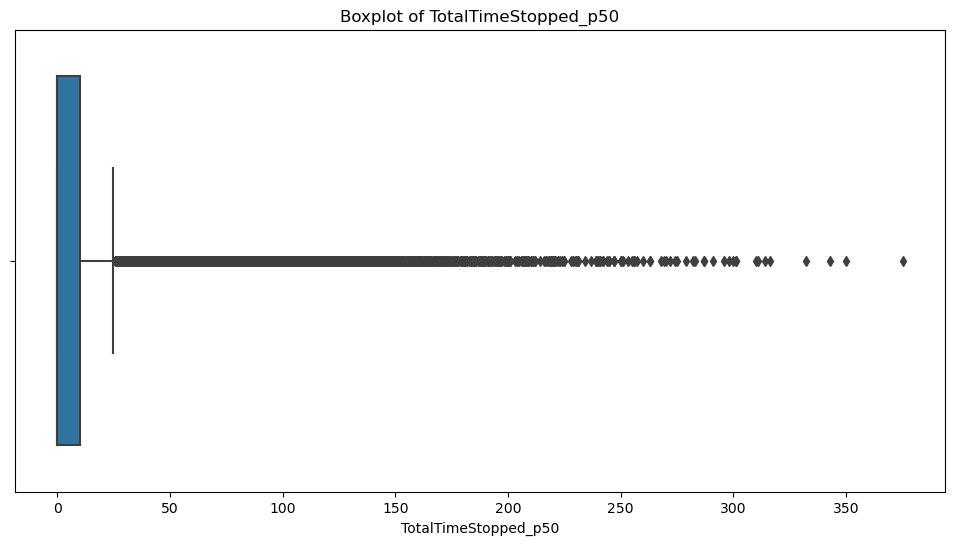

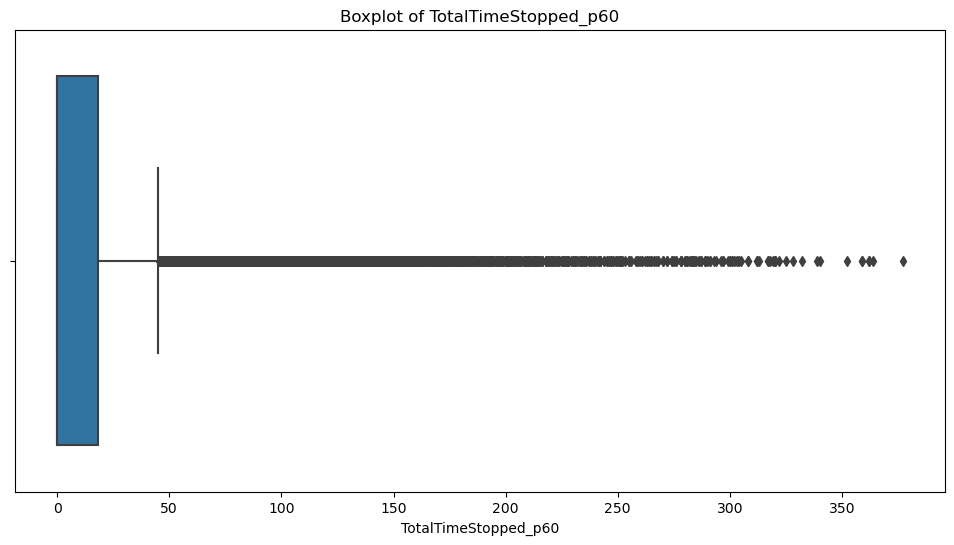

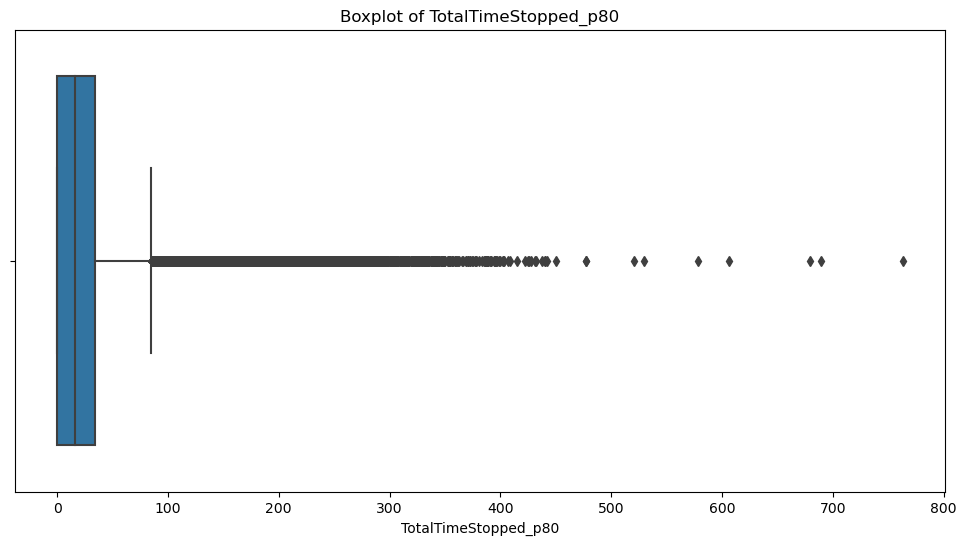

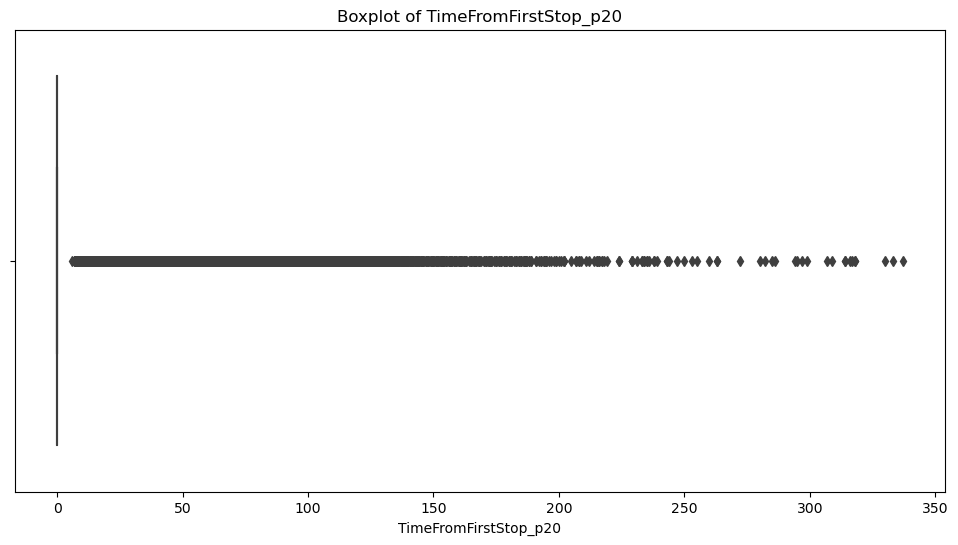

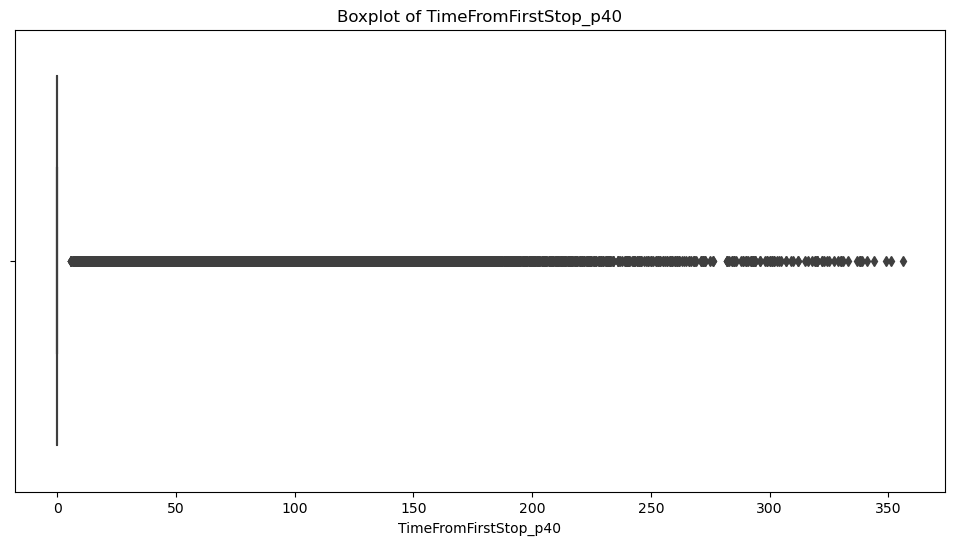

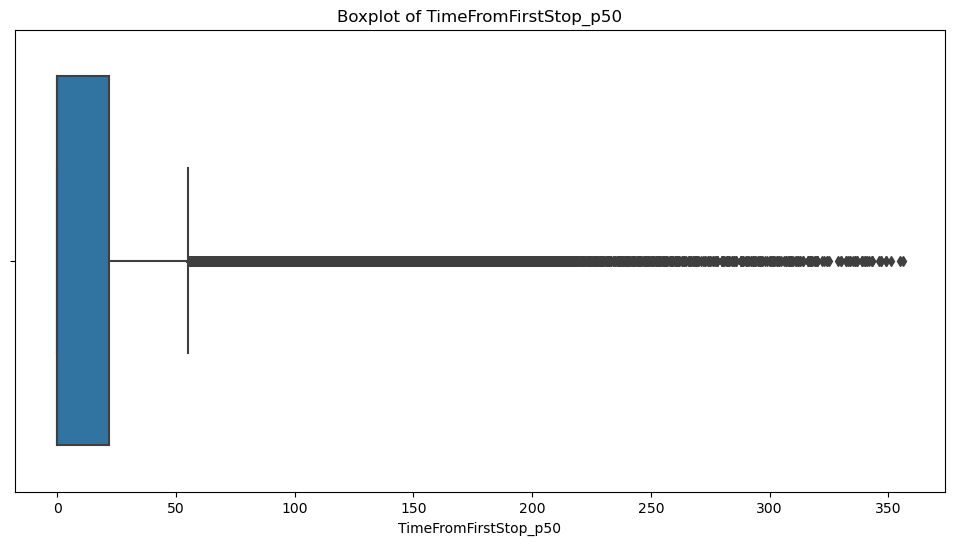

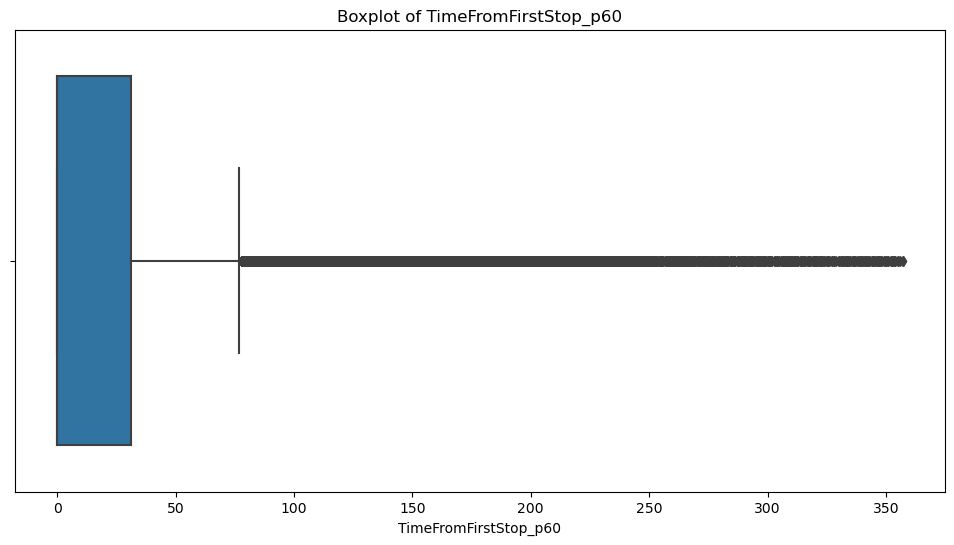

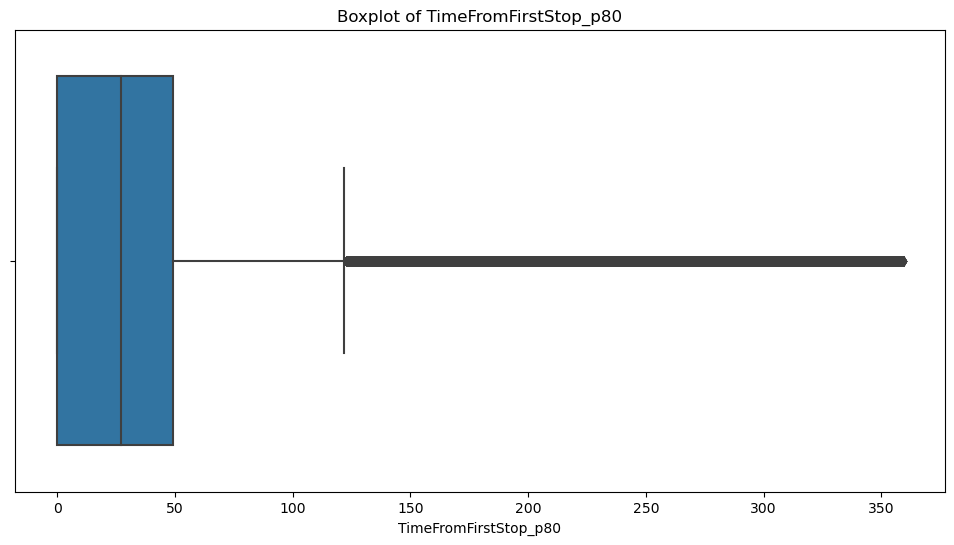

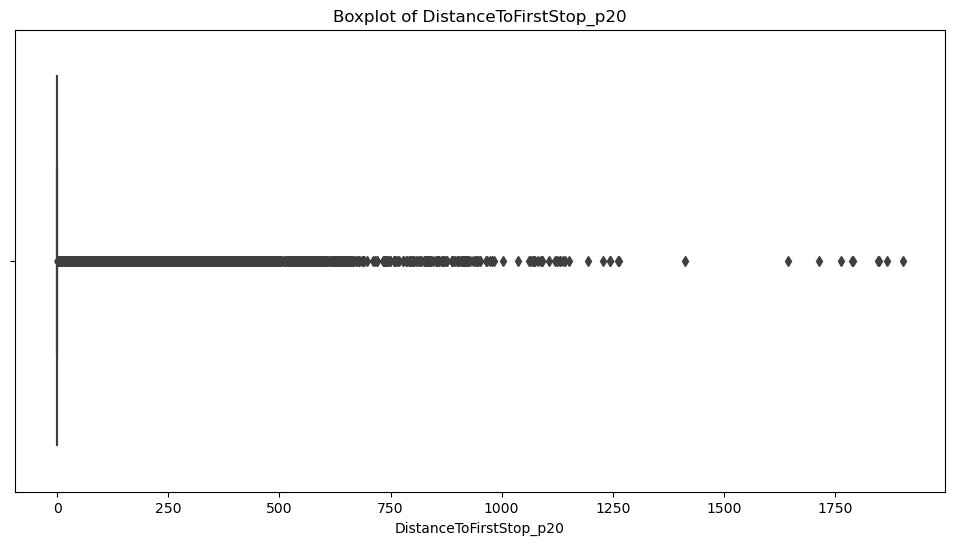

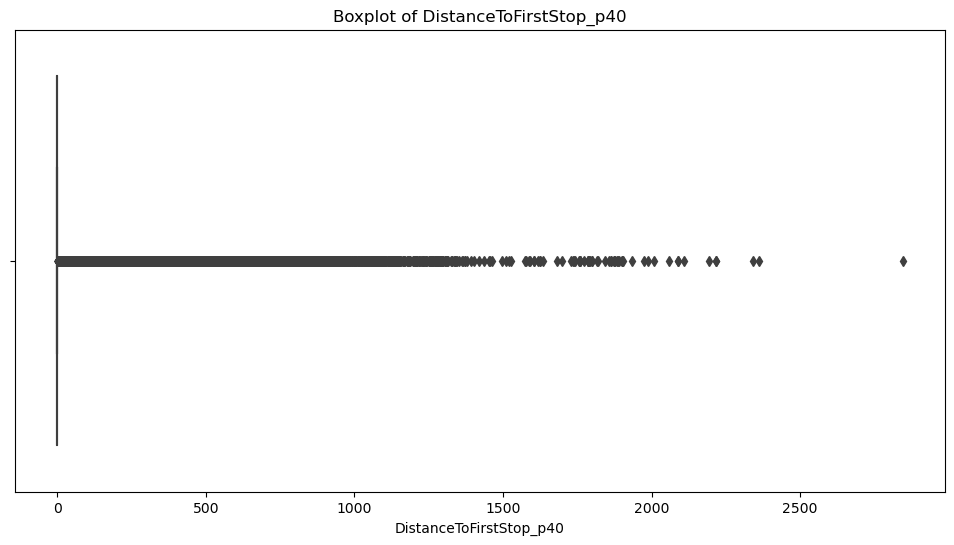

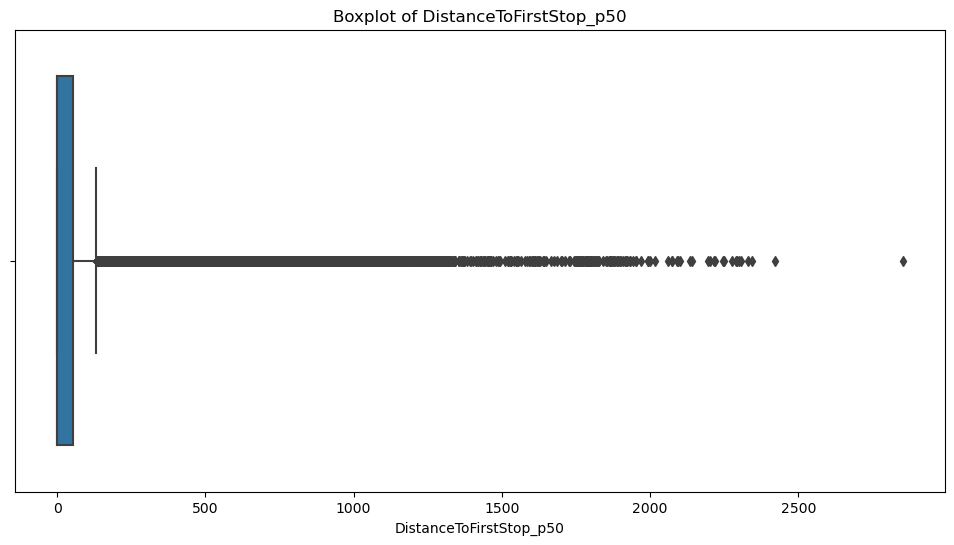

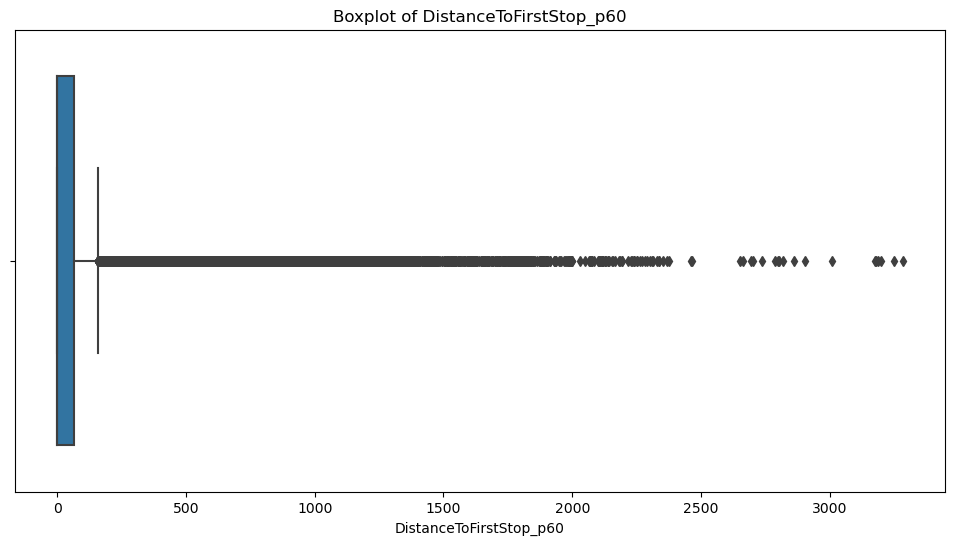

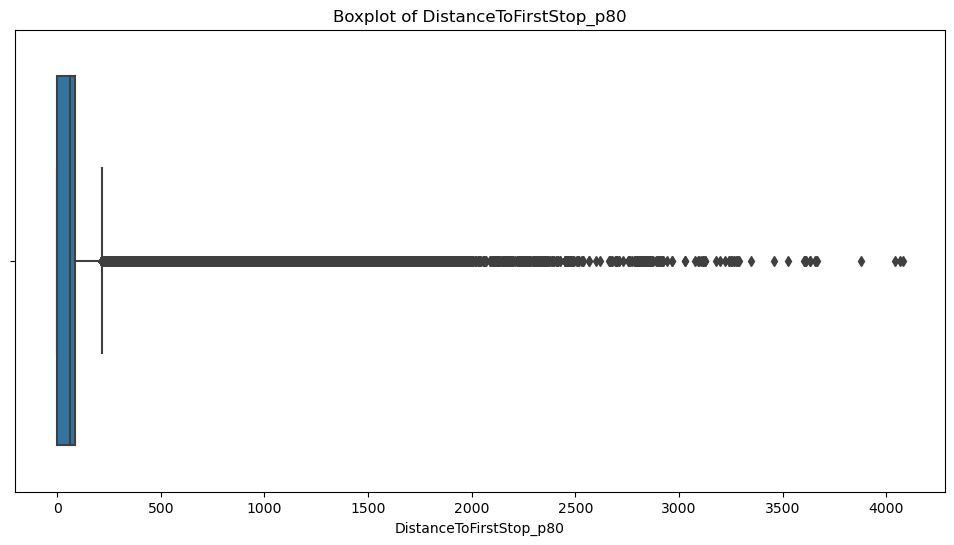

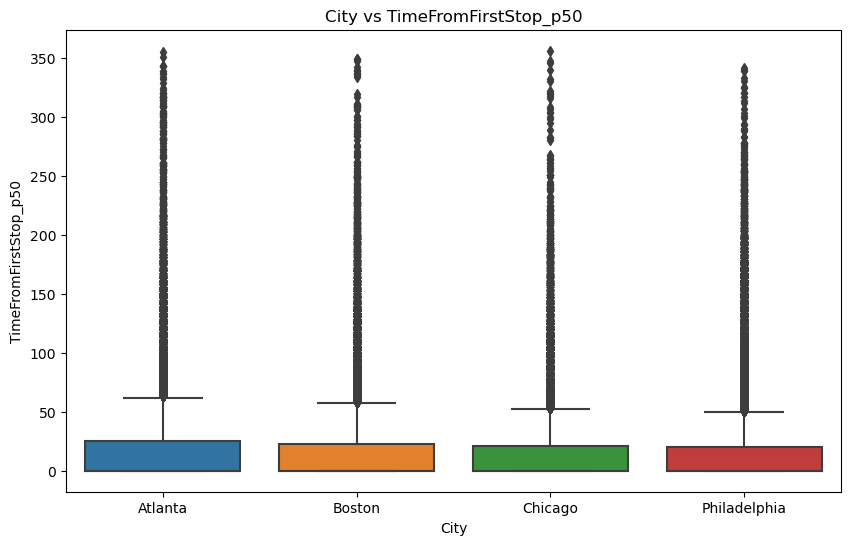

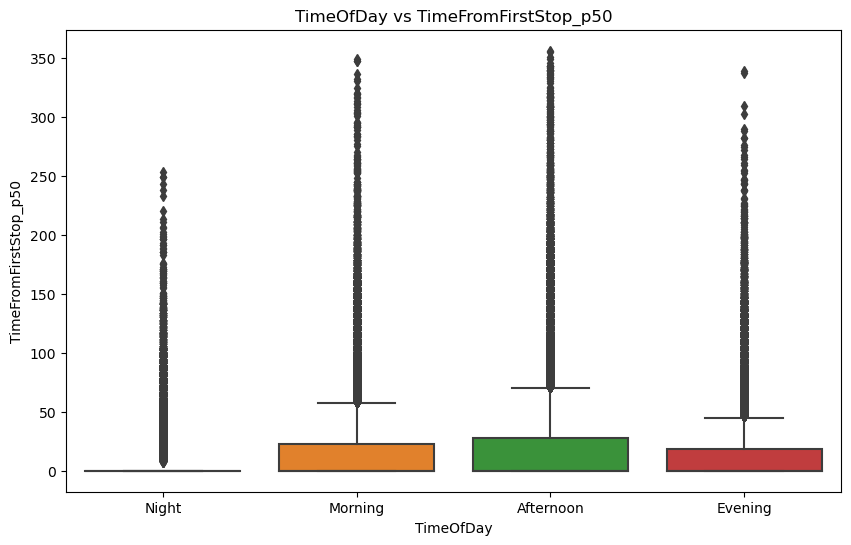

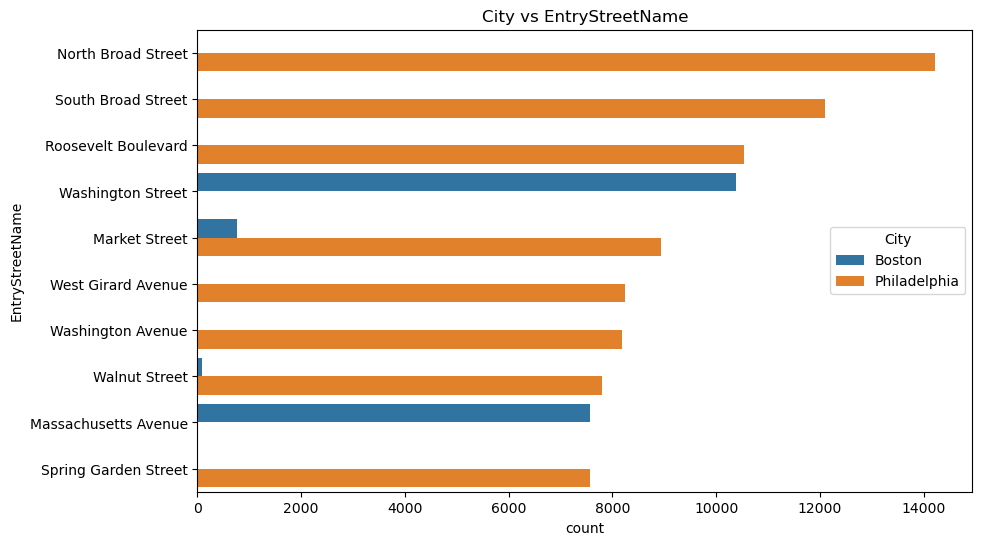

<Figure size 1200x600 with 0 Axes>

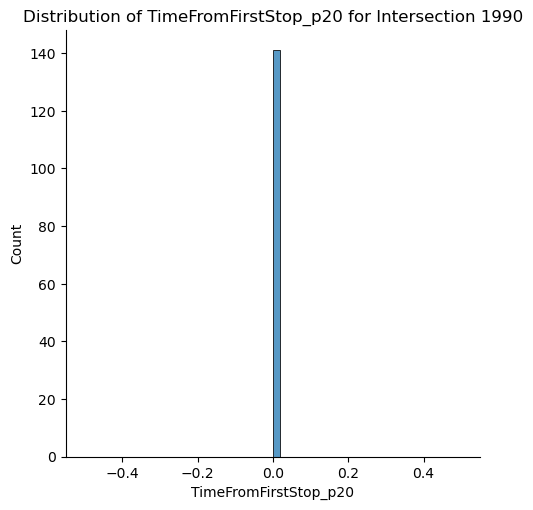

<Figure size 1200x600 with 0 Axes>

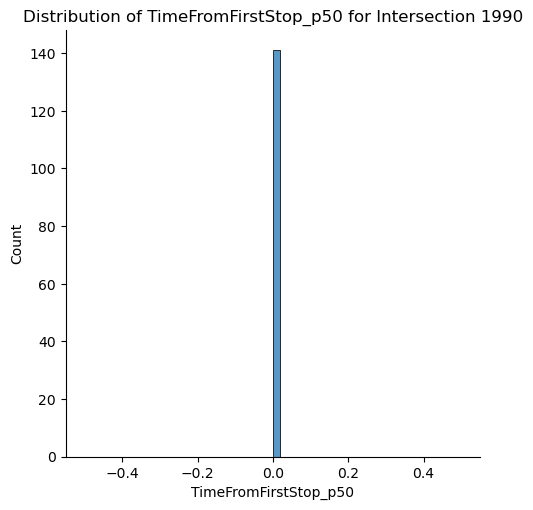

<Figure size 1200x600 with 0 Axes>

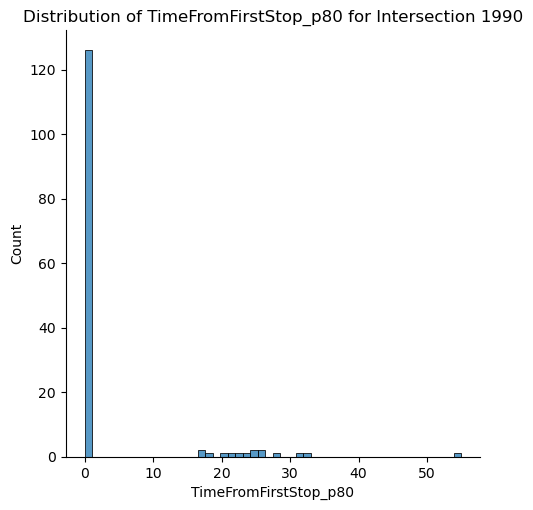

<Figure size 1200x600 with 0 Axes>

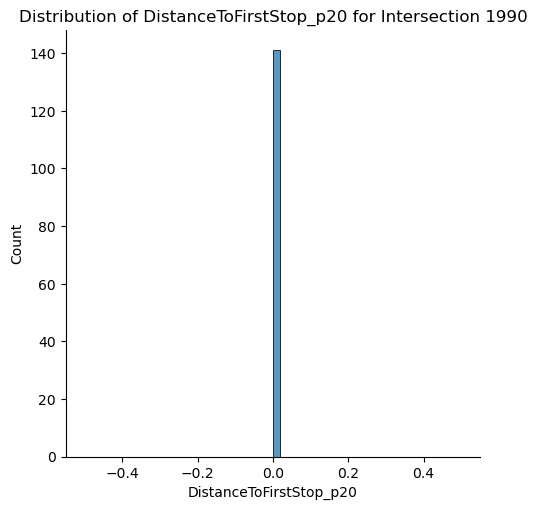

<Figure size 1200x600 with 0 Axes>

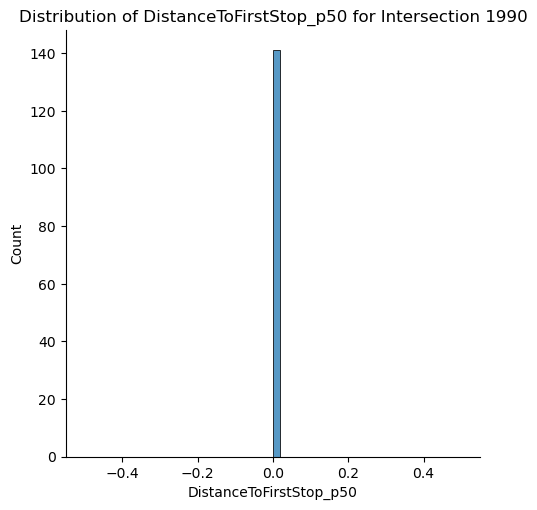

<Figure size 1200x600 with 0 Axes>

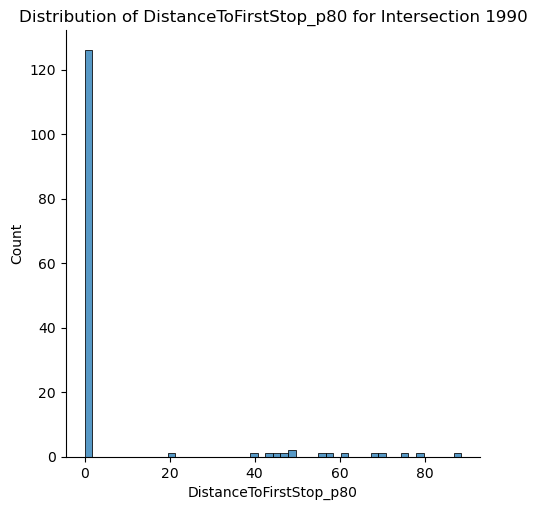

Train Summary Statistics:
              RowId  IntersectionId       Latitude      Longitude  \
count  8.563870e+05   856387.000000  856387.000000  856387.000000   
mean   2.349550e+06      833.283384      39.618965     -77.916488   
std    2.472178e+05      654.308913       2.935437       5.952959   
min    1.921357e+06        0.000000      33.649973     -87.862288   
25%    2.135454e+06      291.000000      39.936739     -84.387607   
50%    2.349550e+06      679.000000      39.982974     -75.175055   
75%    2.563646e+06     1264.000000      41.910047     -75.100495   
max    2.777743e+06     2875.000000      42.381782     -71.025550   

                Hour        Weekend          Month  TotalTimeStopped_p20  \
count  856387.000000  856387.000000  856387.000000         856387.000000   
mean       12.431234       0.277880       9.104808              1.755596   
std         6.071843       0.447954       1.991094              7.146549   
min         0.000000       0.000000       1.0000

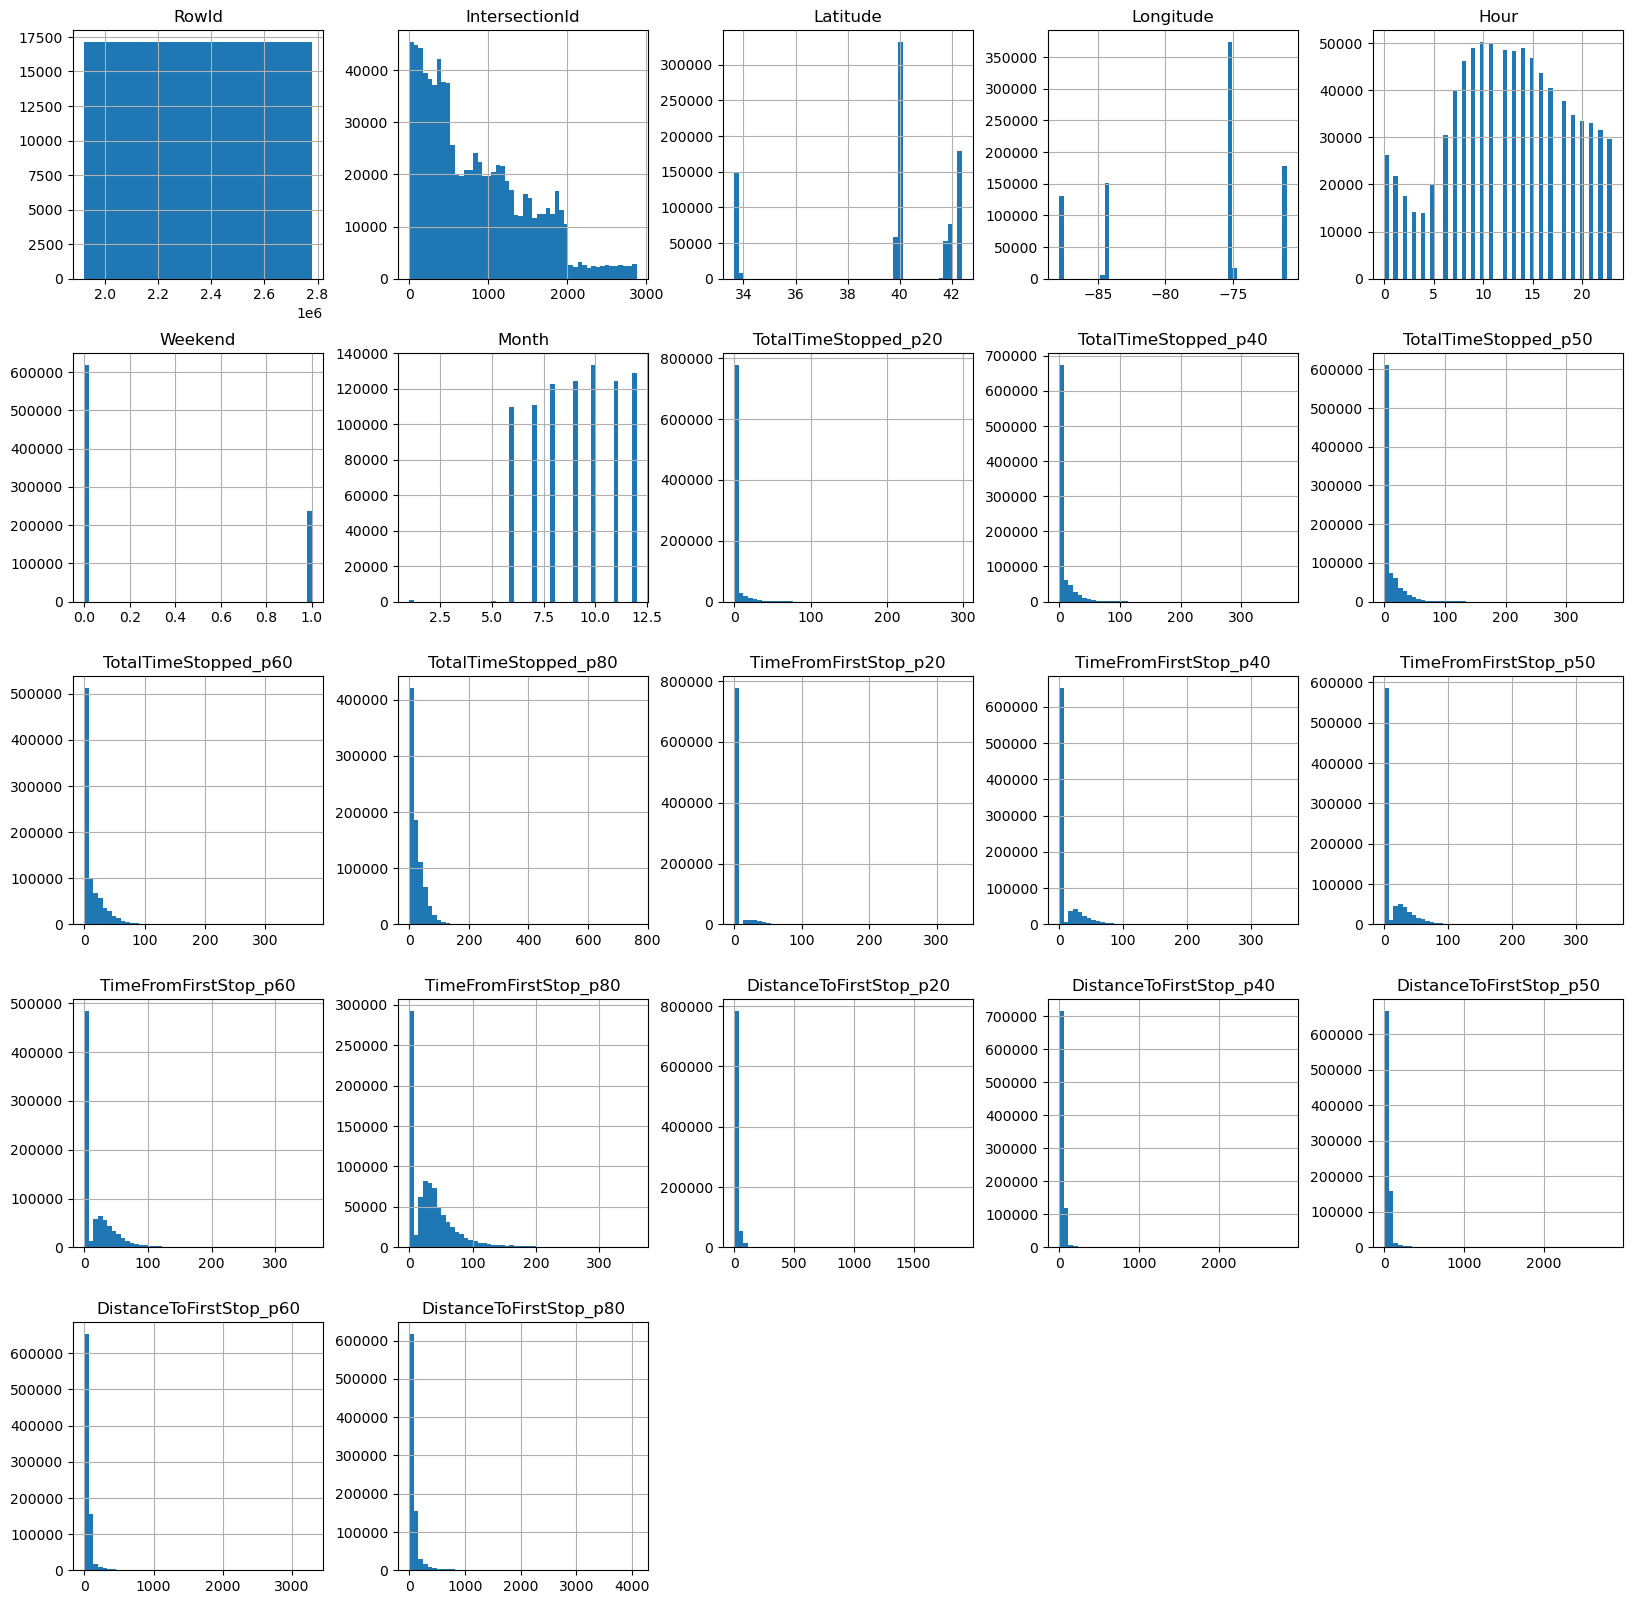

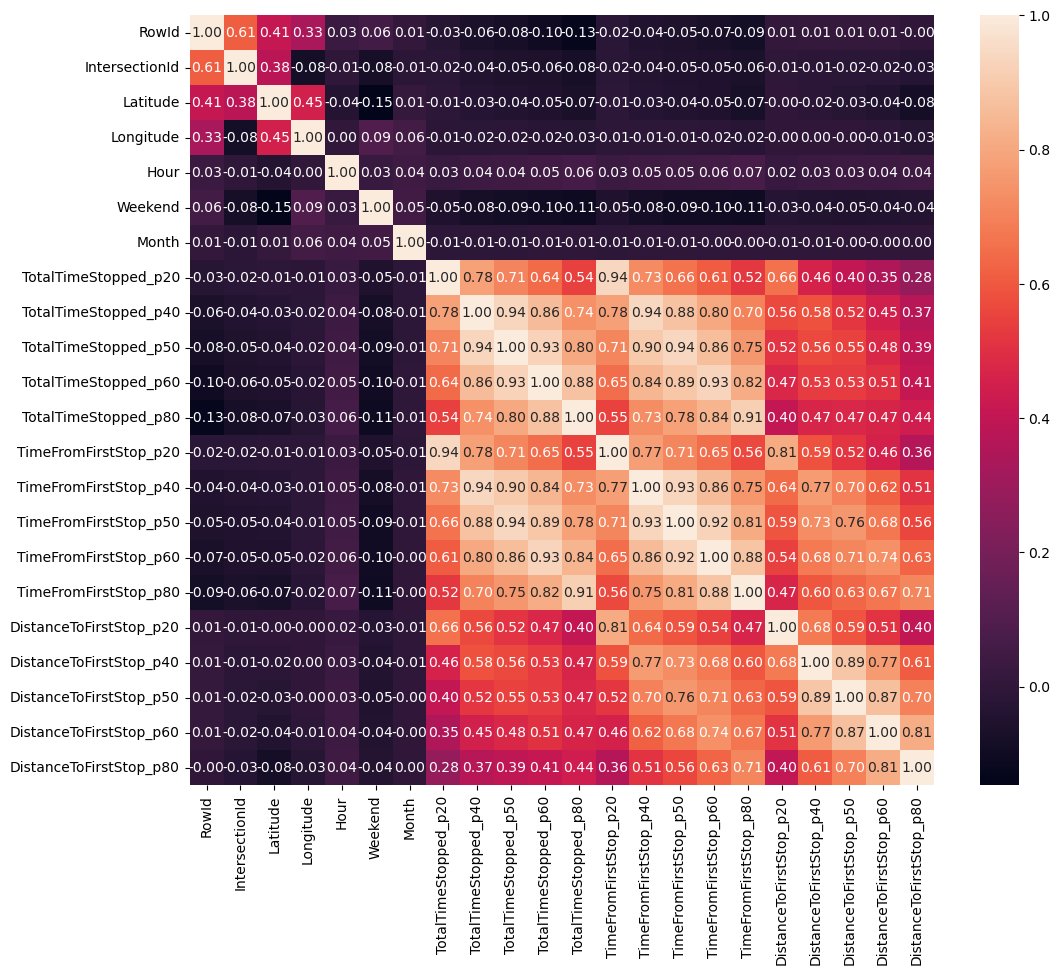

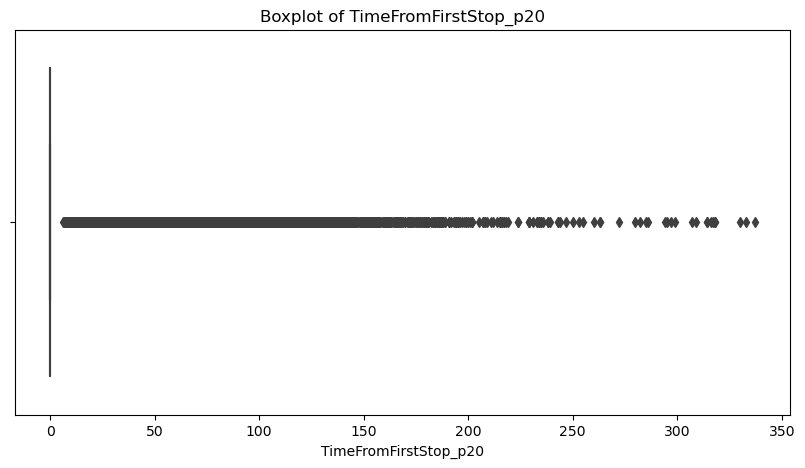

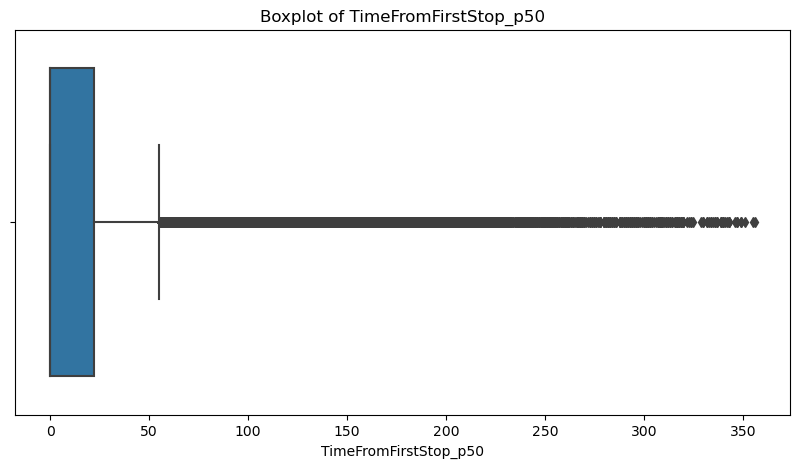

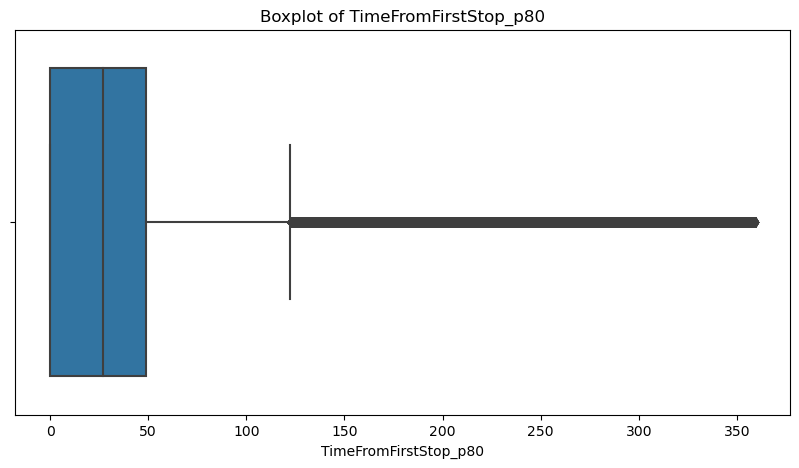

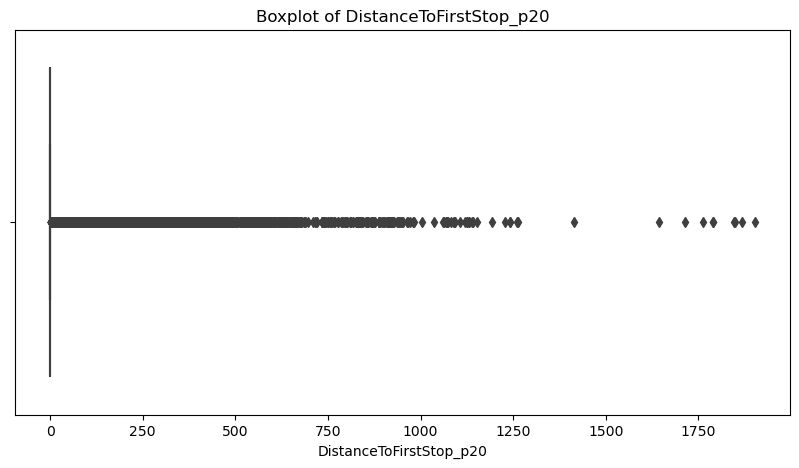

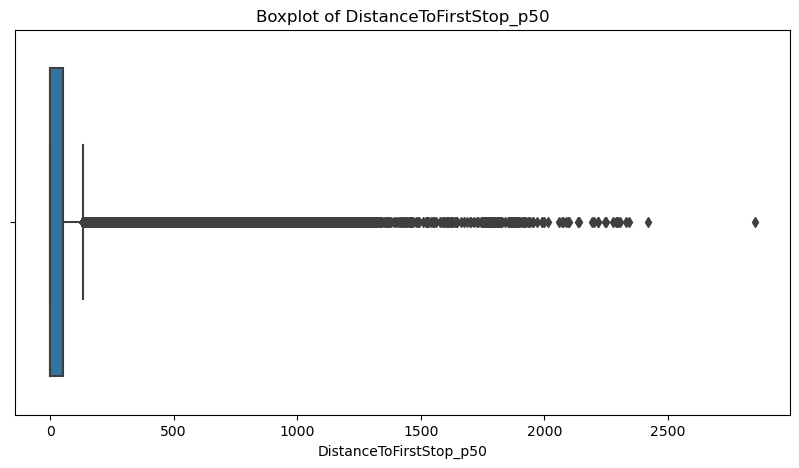

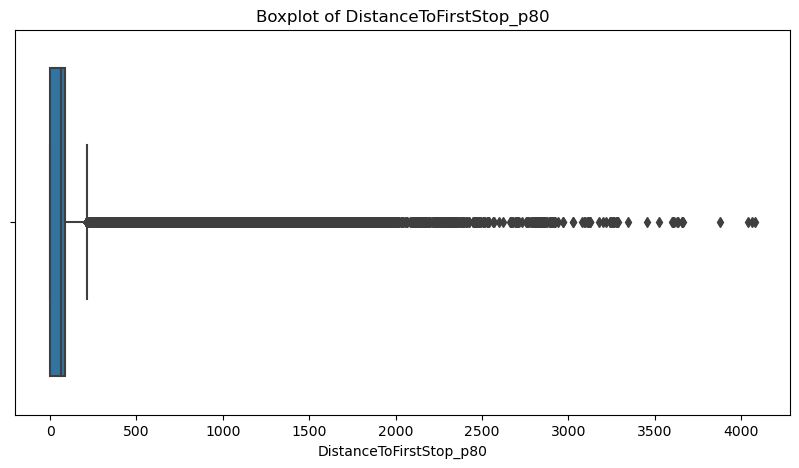

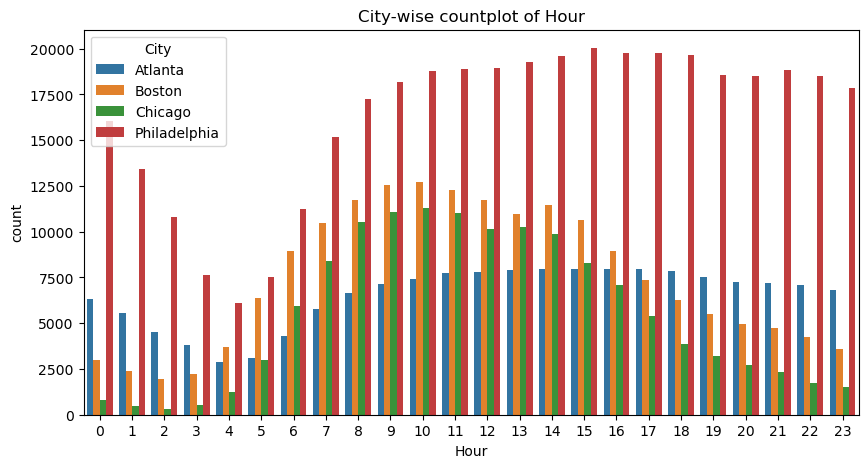

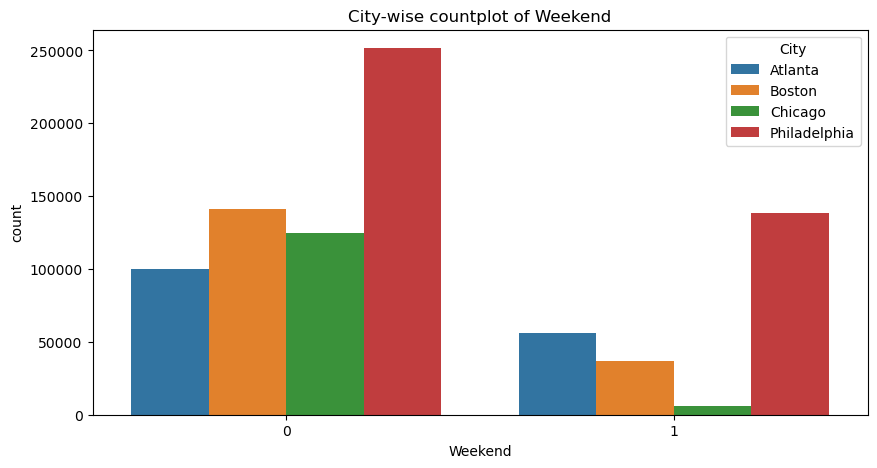

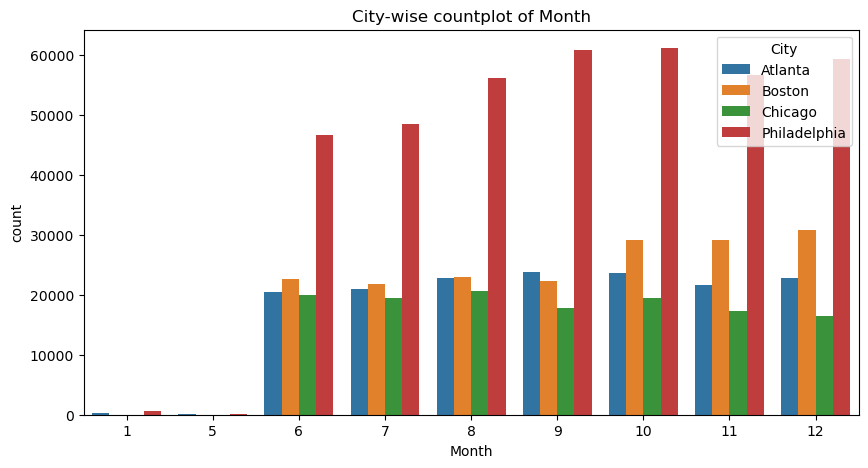

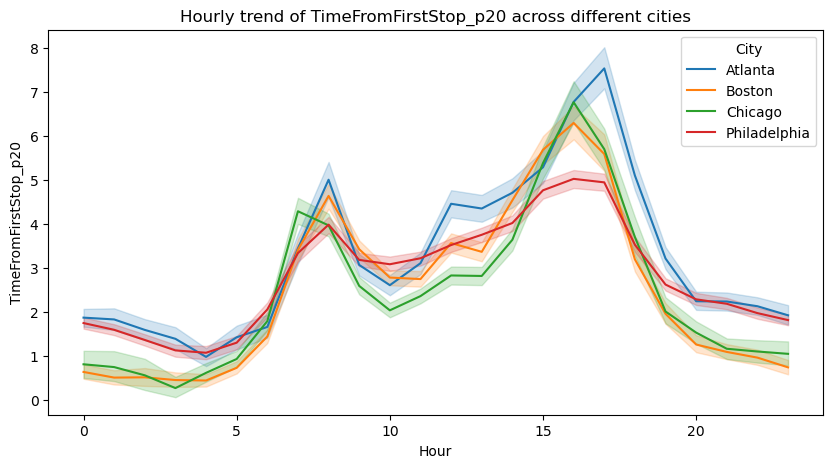

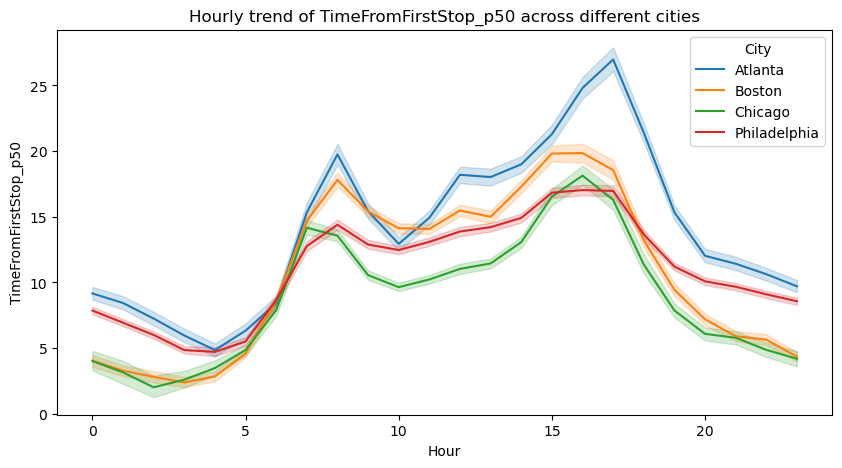

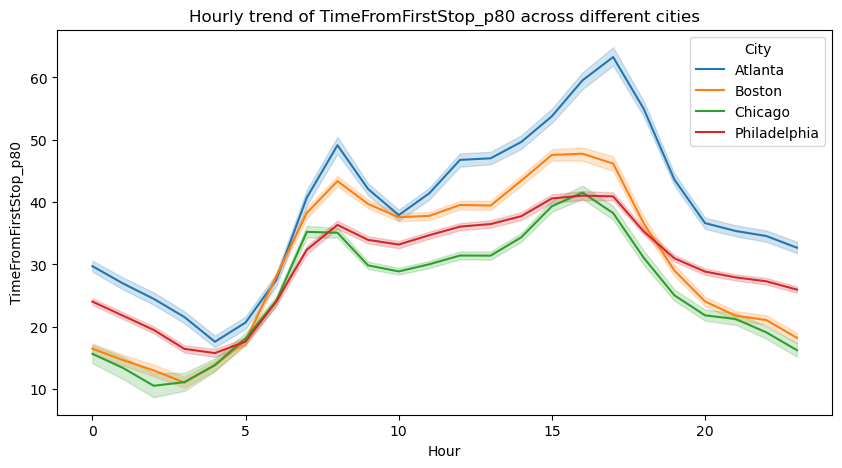

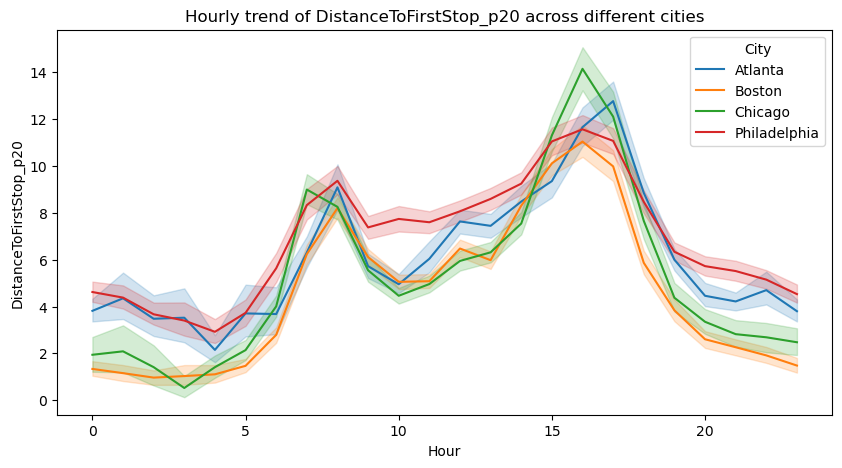

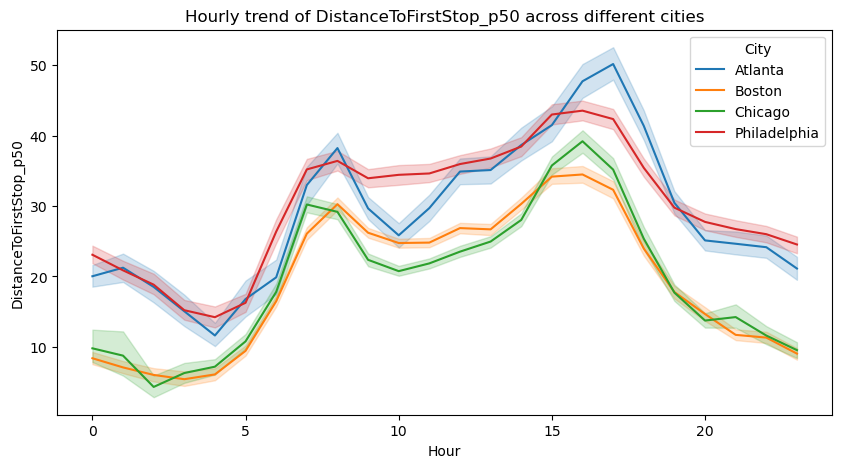

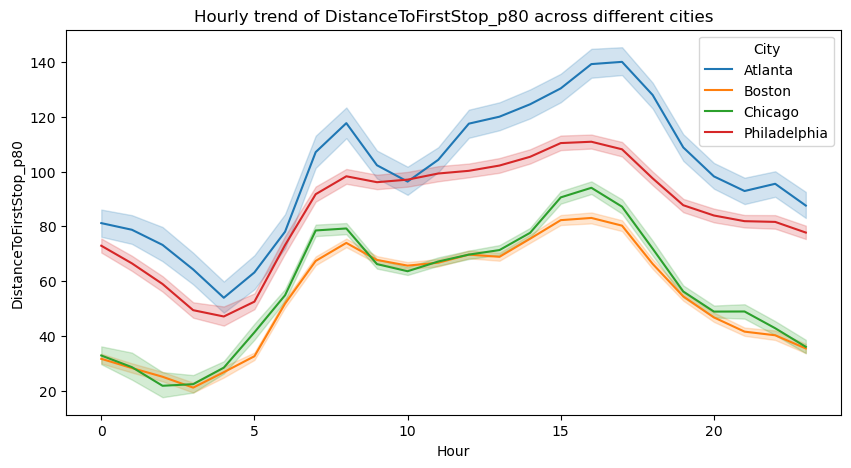

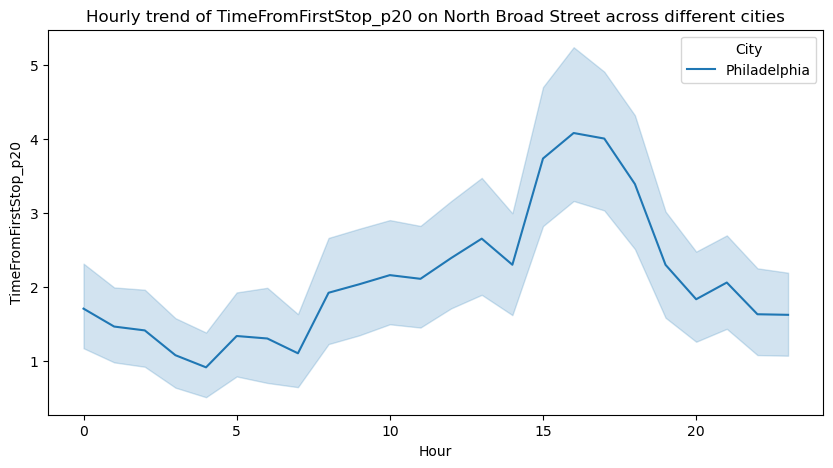

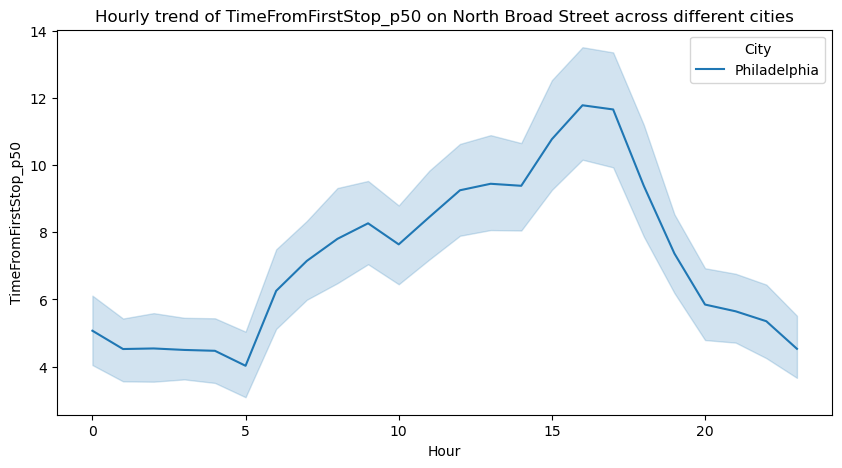

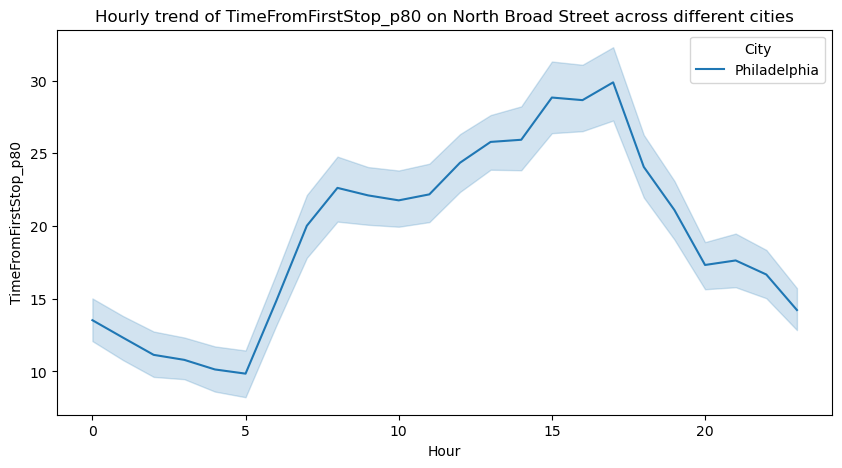

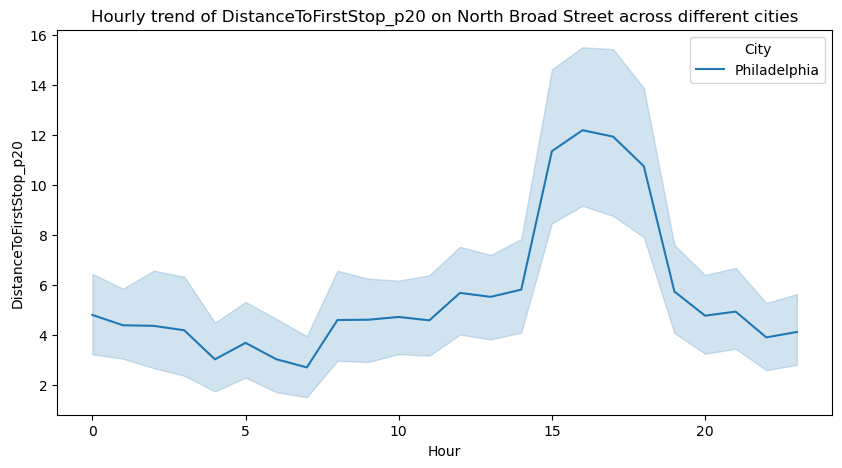

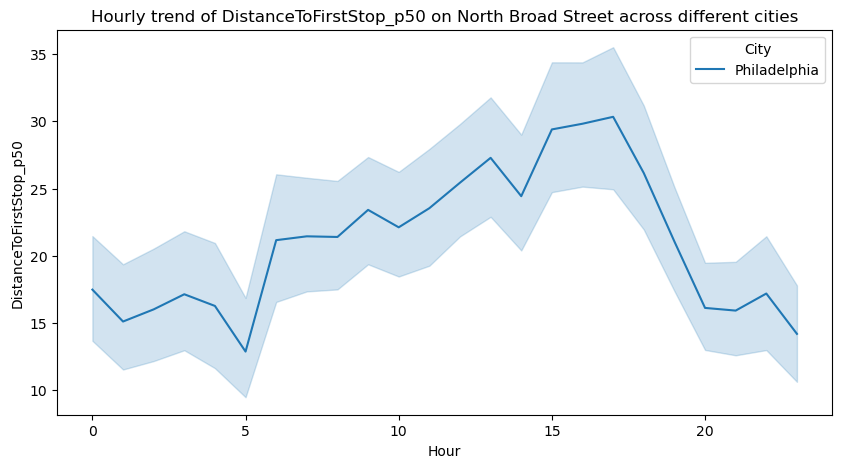

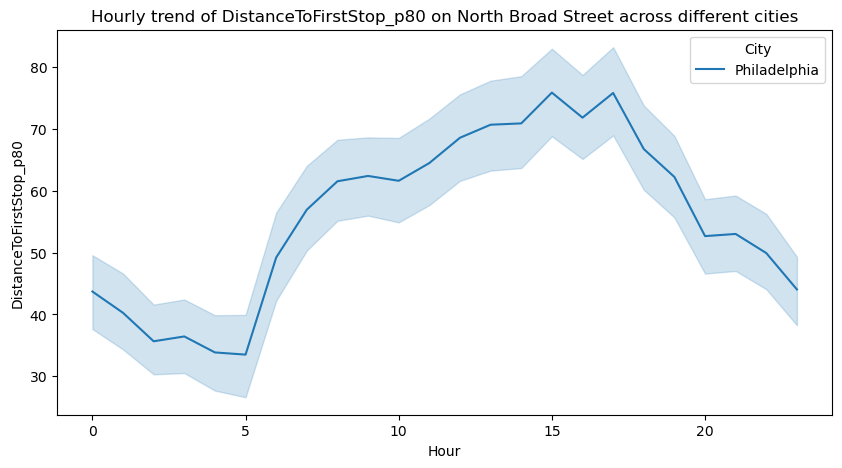

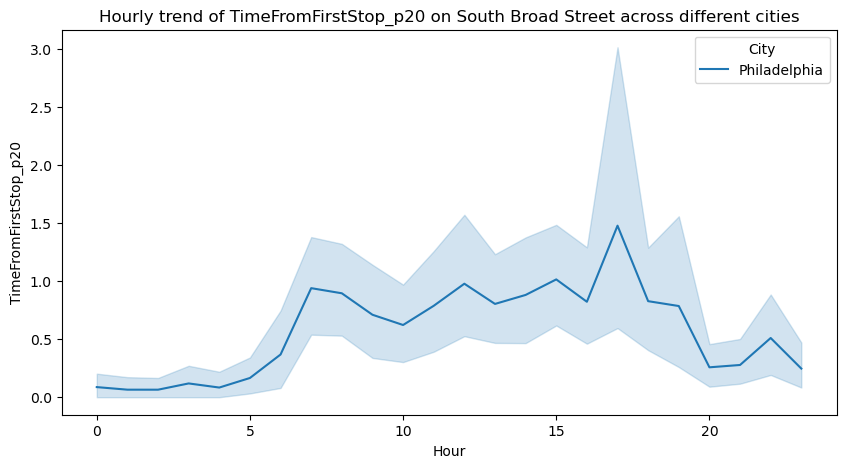

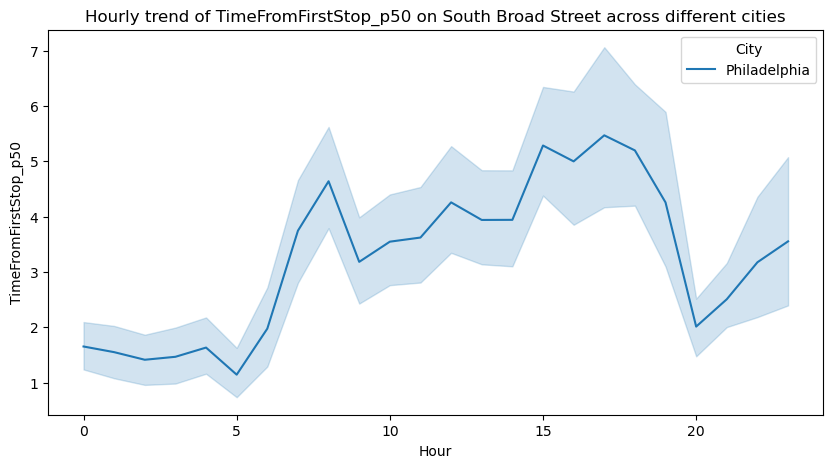

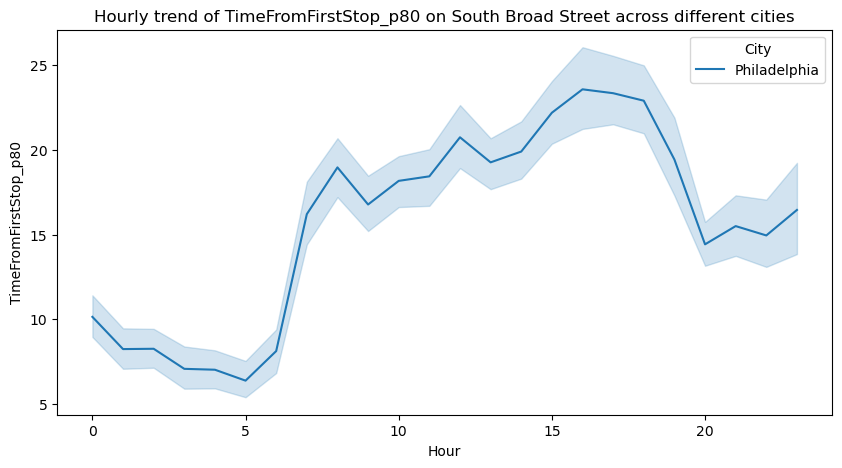

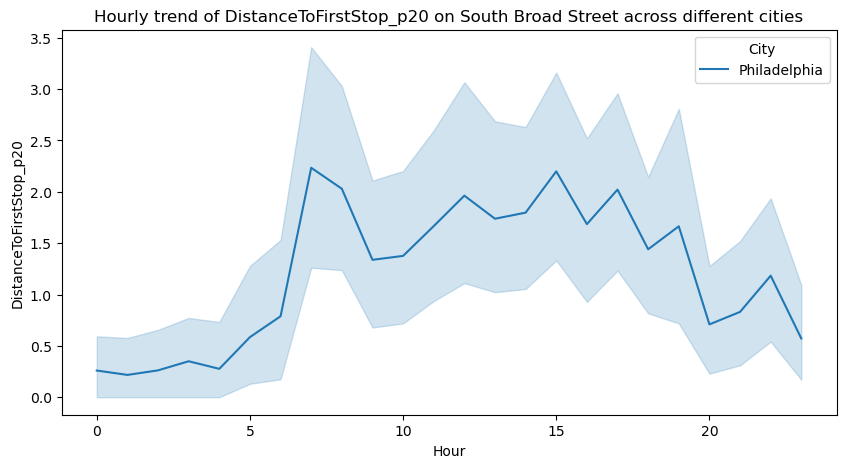

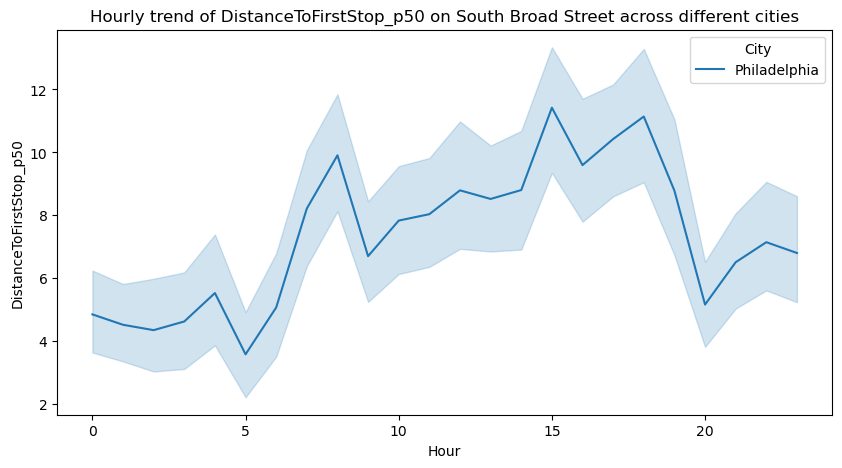

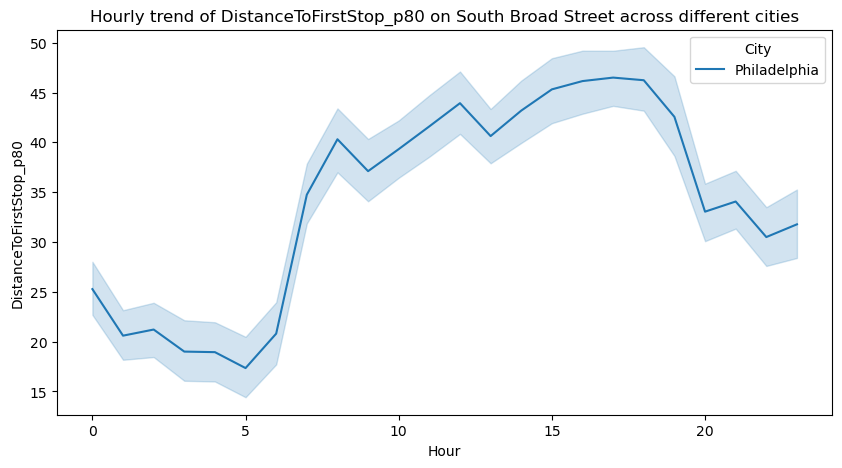

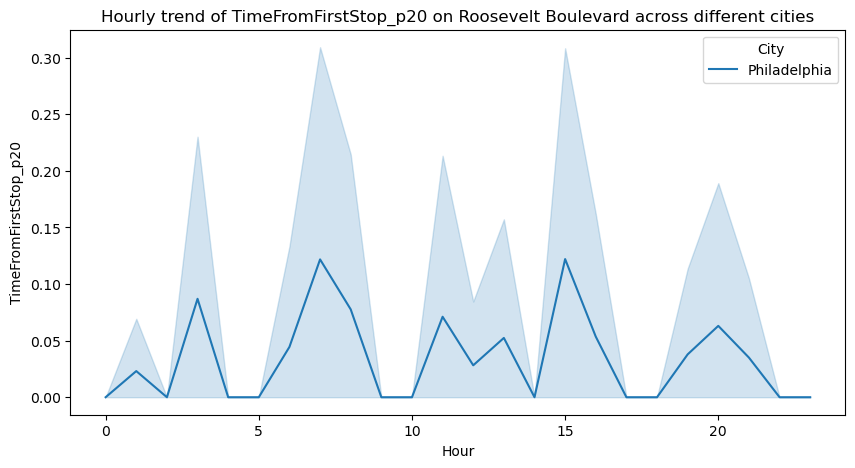

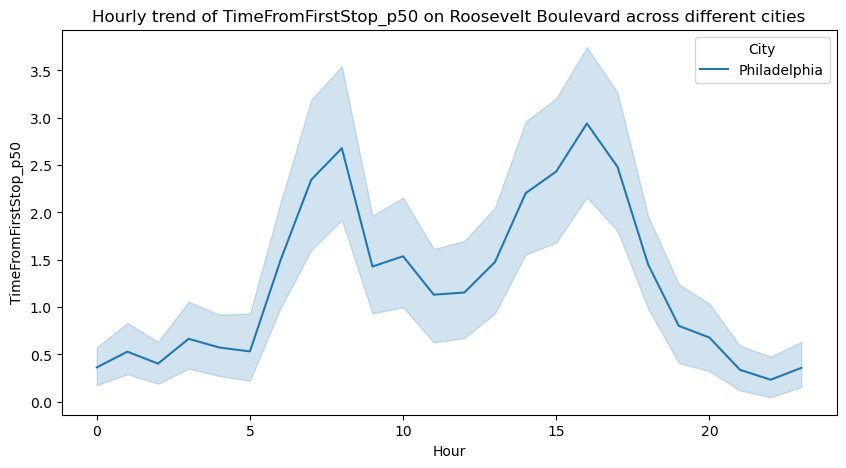

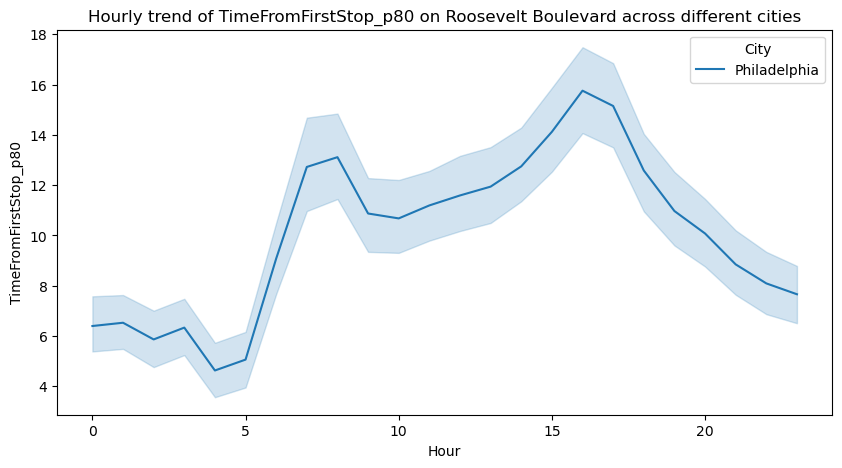

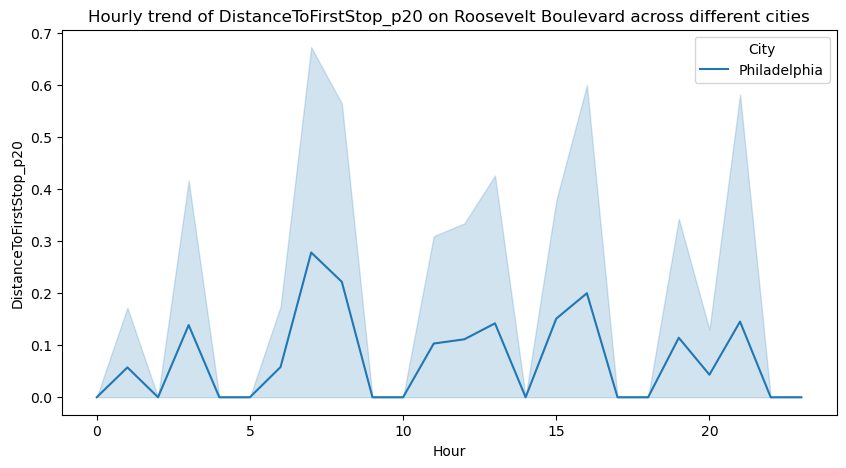

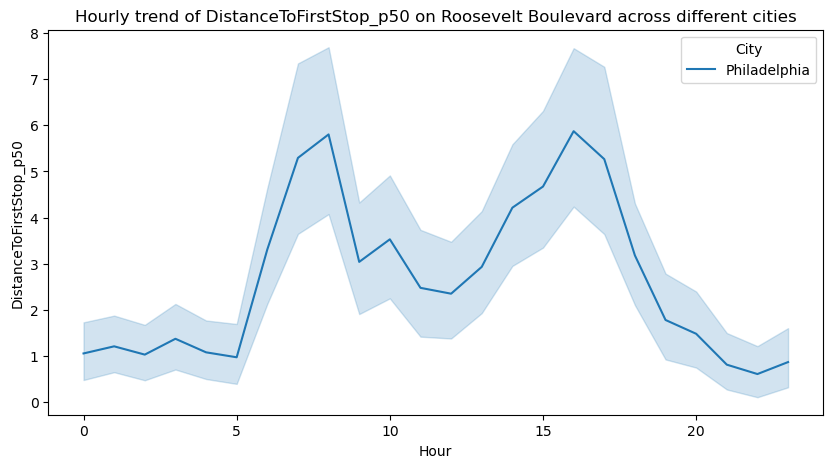

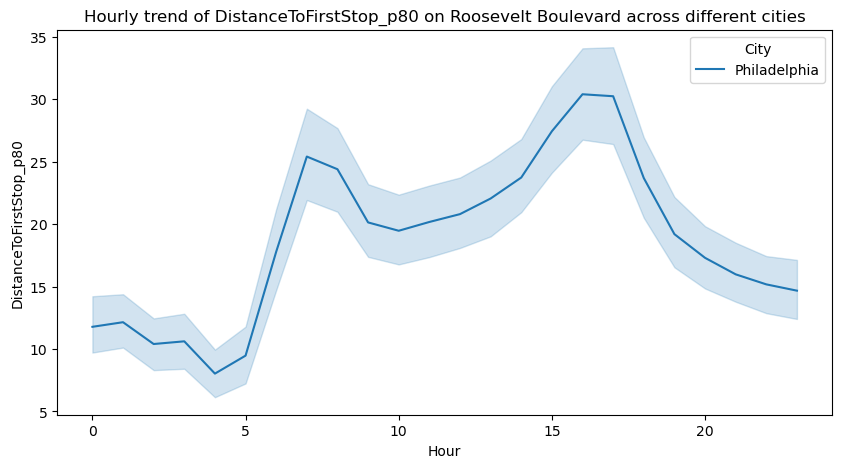

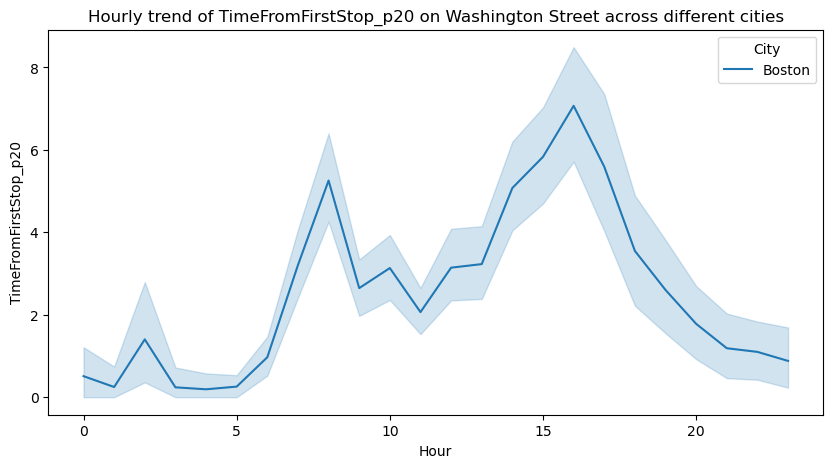

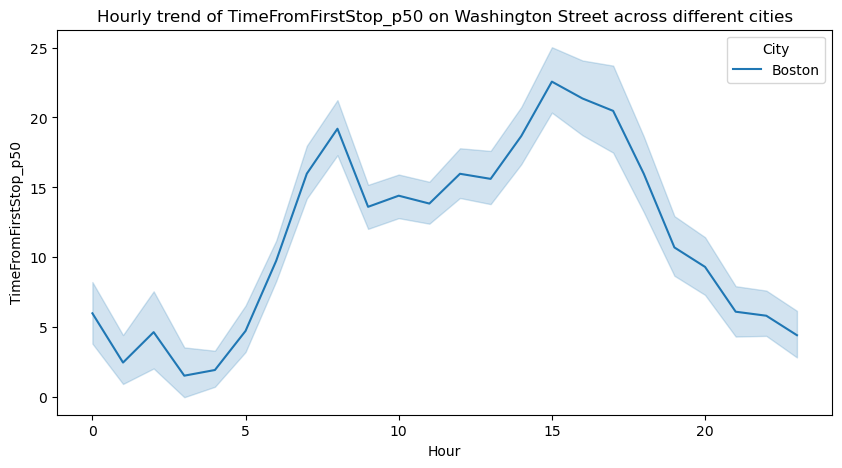

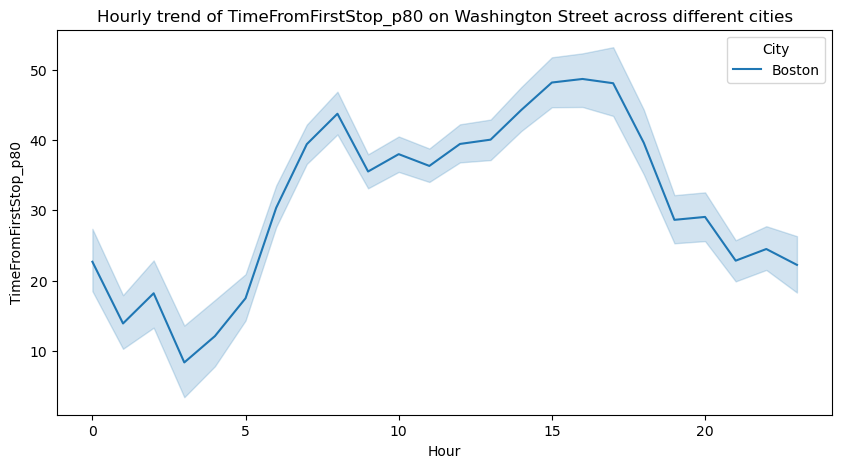

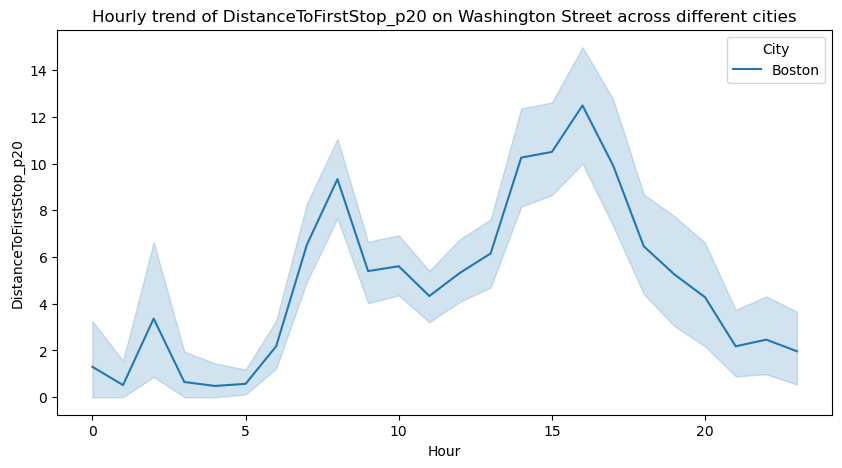

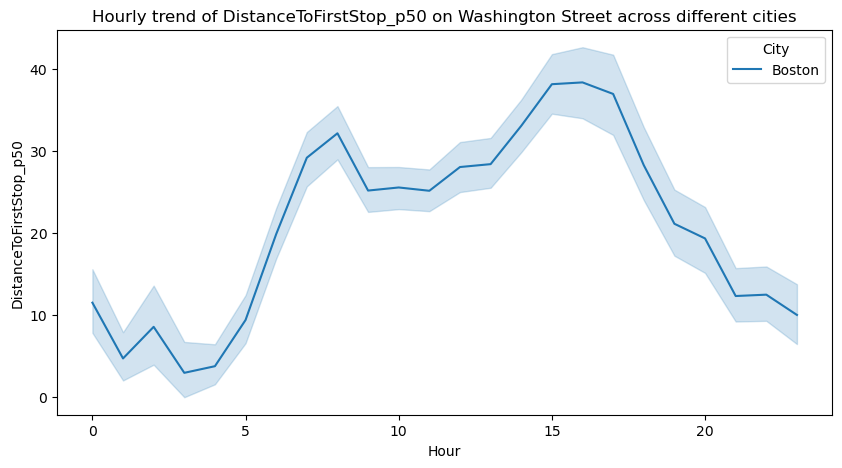

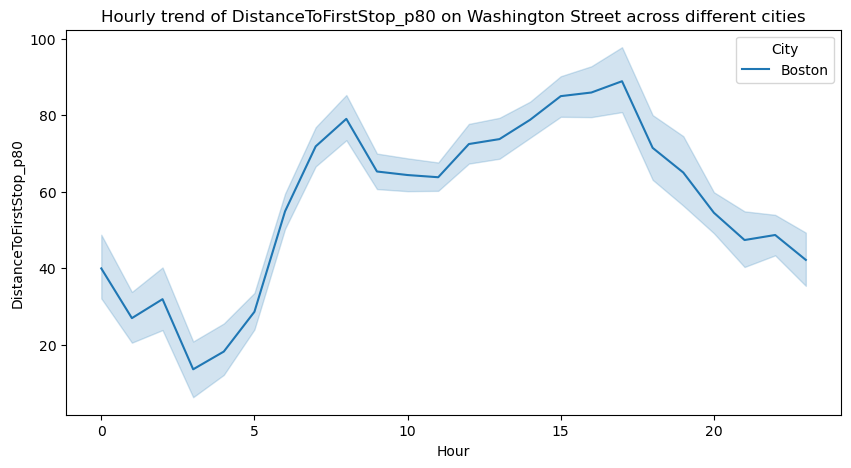

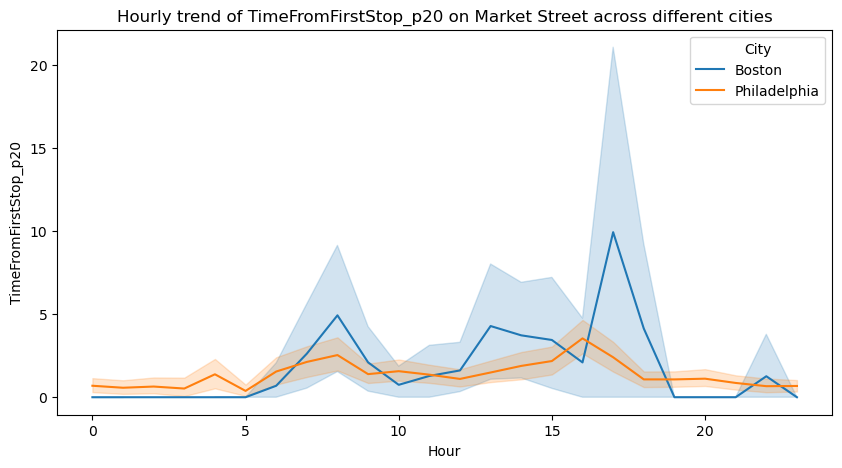

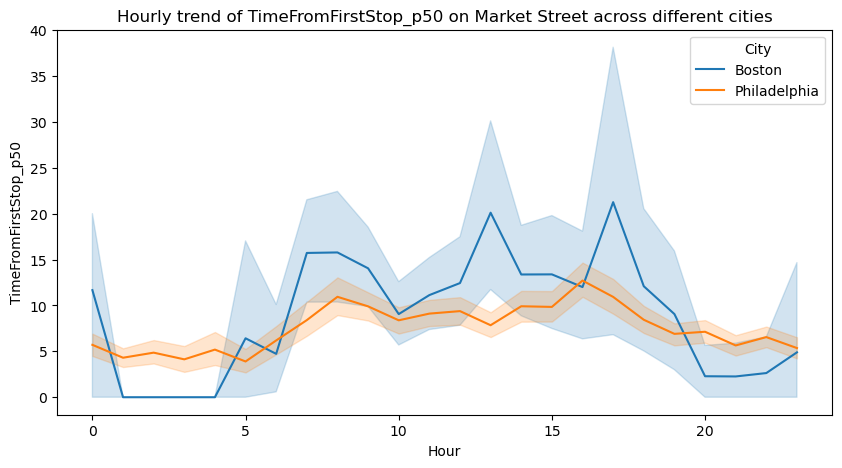

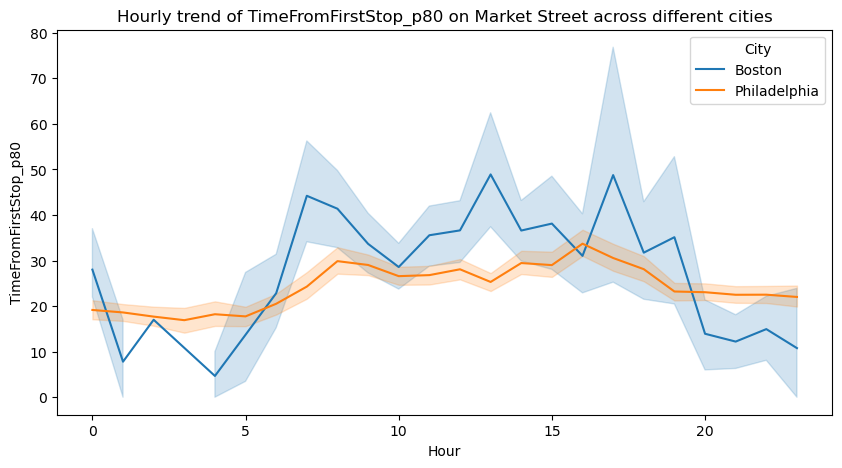

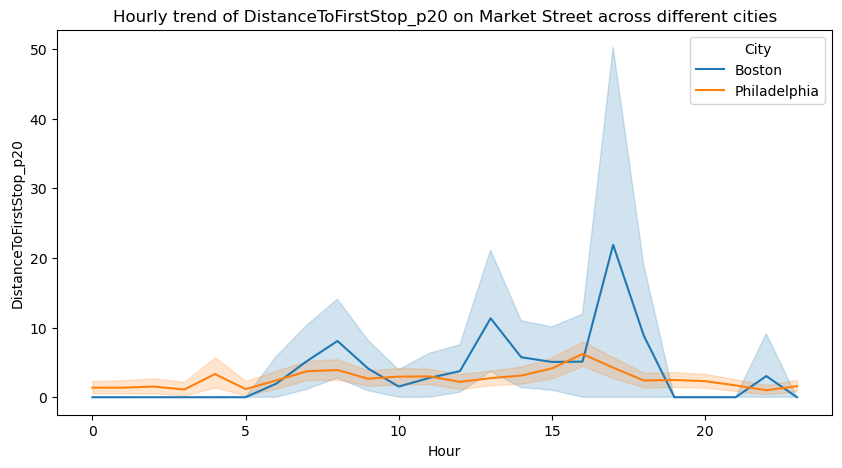

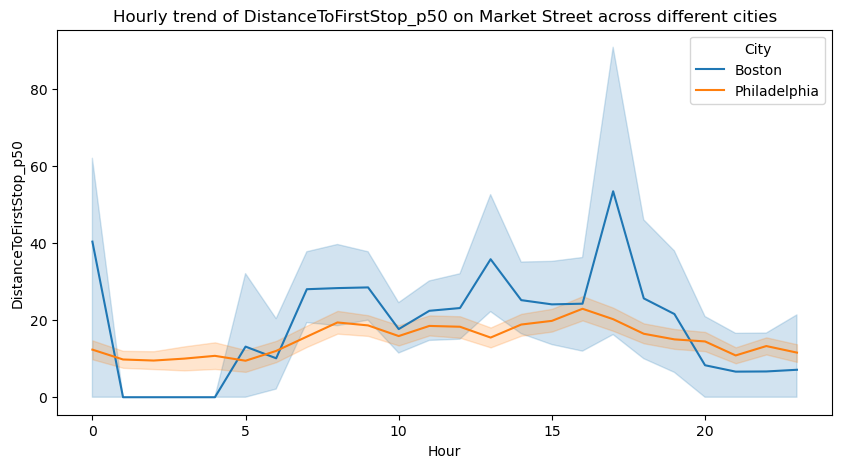

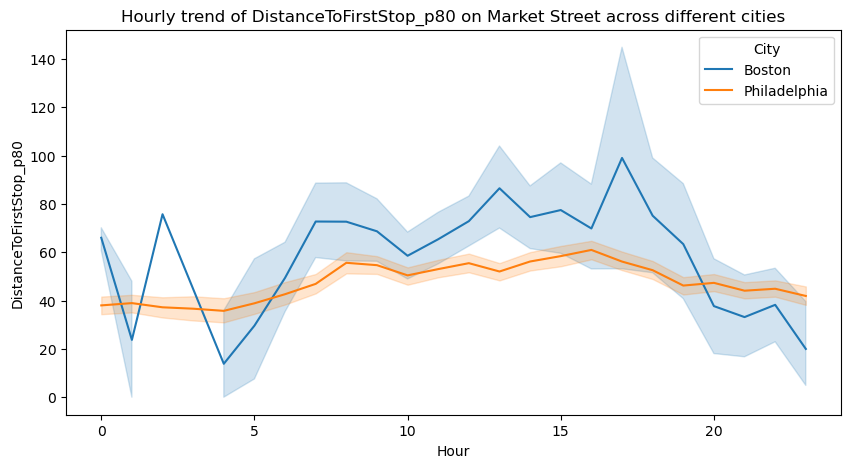

ValueError: I/O operation on closed file.

In [5]:
# Import required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Load data.
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

# Print first 5 rows.
print("Test Data:")
print(test_df.head())
print("\nTrain Data:")
print(train_df.head())

# Data cleaning and processing.

# Check missing values.
print(train_df.isnull().sum())

# Handle missing values (Data streams should be similar for data area).
train_df.fillna(method='bfill', inplace=True)  # backward fill
test_df.fillna(method='bfill', inplace=True)  # backward fill

# Check missing values again.
print(train_df.isnull().sum())


# Check for duplicate rows.
print(train_df.duplicated().sum())


# Check categories
categorical_columns = ['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'City', 'Path'] 

for col in categorical_columns:
    print(f'Unique values in {col}: {train_df[col].unique()}')
    print(f'Number of unique values in {col}: {train_df[col].nunique()}')
    print("------\n")


# List numeric columns.
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    
    
    
# EDA.

# Relationship between Time of Day, City and Street Name.
# Create a new feature for the time of day.
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

train_df['TimeOfDay'] = train_df['Hour'].apply(get_time_of_day)



# Plot relationships.

# Relationship between City and TimeFromFirstStop_p50.
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='TimeFromFirstStop_p50', data=train_df)
plt.title('City vs TimeFromFirstStop_p50')
plt.show()

# Relationship between TimeOfDay and TimeFromFirstStop_p50.
plt.figure(figsize=(10, 6))
sns.boxplot(x='TimeOfDay', y='TimeFromFirstStop_p50', data=train_df)
plt.title('TimeOfDay vs TimeFromFirstStop_p50')
plt.show()

# Relationship between City and Street Name (Top 10 streets with most data points).
plt.figure(figsize=(10, 6))
top_streets = train_df['EntryStreetName'].value_counts().index[:10]
filtered_df = train_df[train_df['EntryStreetName'].isin(top_streets)]
sns.countplot(y='EntryStreetName', hue='City', data=filtered_df, order=top_streets)
plt.title('City vs EntryStreetName')
plt.show()


# EDA for each Intersection.
counter = 0
for intersection in train_df['IntersectionId'].unique():
    if counter >= 20:
        break
    subset = train_df[train_df['IntersectionId'] == intersection]
    
# Distribution of Wait Times.
for column in ['TimeFromFirstStop_p20', 'TimeFromFirstStop_p50', 'TimeFromFirstStop_p80']:
    plt.figure(figsize=(12,6))
    sns.displot(subset[column], bins=50)
    plt.title(f'Distribution of {column} for Intersection {intersection}')
    plt.show()
    counter += 1
    if counter >= 20:
            break
    
    if counter >= 20:
        break

# Distribution of Stop Distances.
for column in ['DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']:
    plt.figure(figsize=(12,6))
    sns.displot(subset[column], bins=50)
    plt.title(f'Distribution of {column} for Intersection {intersection}')
    plt.show()
    counter += 1
    if counter >= 20:
        break


# Relationships in the data.

# Summary Statistics.
print("Train Summary Statistics:")
print(train_df.describe())
print("\nTest Summary Statistics:")
print(test_df.describe())


# Distributions of numeric variables.
train_df.hist(figsize=(20, 20), bins=50)


# Correlation matrix for variables.
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f")
plt.show()


# Check for outliers.
num_vars = ['TimeFromFirstStop_p20', 'TimeFromFirstStop_p50', 'TimeFromFirstStop_p80', 
            'DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']
for var in num_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=train_df[var])
    plt.title(f"Boxplot of {var}")
    plt.show()
    

# Relationship between City and other variables.
categorical_vars = ['Hour', 'Weekend', 'Month']
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, hue='City', data=train_df)
    plt.title(f"City-wise countplot of {var}")
    plt.show()

    
# Relationship between Time of Day and Wait Times.
for var in num_vars:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='Hour', y=var, hue='City', data=train_df)
    plt.title(f"Hourly trend of {var} across different cities")
    plt.show()

    
# Analysis of specific streets.
top_streets = train_df['EntryStreetName'].value_counts().index[:5]
for street in top_streets:
    subset = train_df[train_df['EntryStreetName'] == street]
    for var in num_vars:
        plt.figure(figsize=(10, 5))
        sns.lineplot(x='Hour', y=var, hue='City', data=subset)
        plt.title(f"Hourly trend of {var} on {street} across different cities")
        plt.show()




# Model building.

# Select features and target.
X = train_df[['Latitude', 'Longitude', 'Hour', 'Weekend', 'Month']]
y_time = train_df[['TimeFromFirstStop_p20', 'TimeFromFirstStop_p50', 'TimeFromFirstStop_p80']]
y_dist = train_df[['DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']]

# Train-test split.
X_train, X_test, y_train_time, y_test_time = train_test_split(X, y_time, test_size=0.2, random_state=42)
X_train, X_test, y_train_dist, y_test_dist = train_test_split(X, y_dist, test_size=0.2, random_state=42)

# Random Forest.
rf_time = RandomForestRegressor(n_estimators=100, random_state=42)
rf_time.fit(X_train, y_train_time)

rf_dist = RandomForestRegressor(n_estimators=100, random_state=42)
rf_dist.fit(X_train, y_train_dist)

# Save the predictions for test data.
test_X = test_df[['Latitude', 'Longitude', 'Hour', 'Weekend', 'Month']]

# Assuming RF was better for time.
test_predictions_time = rf_time.predict(test_X)

# Assuming RF was better for distance.
test_predictions_dist = rf_dist.predict(test_X)

# Open CSV file for output.
with open('M5ProjOut.csv', 'w') as f:
    f.write("TargetId,Target\n")  # write header


# Save the predictions in the required format.
# Counter for the number of rows.
num_rows = 0 

# Maximum number of rows to write.
target_rows = 11522010  
for i in range(test_X.shape[0]):
    if num_rows >= target_rows:
        break  
row_id = test_df['RowId'].iloc[i]
for j in range(3):
    if num_rows >= target_rows:
        break 

time_prediction = test_predictions_time[i, j]
dist_prediction = test_predictions_dist[i, j]
            
# Write time prediction to M5ProjOut.csv.
f.write(f"{row_id}_{j},{time_prediction}\n")
num_rows += 1 
if num_rows >= target_rows: 
    break  
            
# Write distance prediction to M5ProjOut.csv.
f.write(f"{row_id}_{j+3},{dist_prediction}\n")

# Counter increase
num_rows += 1 